In [67]:
# importing the libraries

import numpy as np
import pandas as pd

# for displaying all the columns & rows in the dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for categorical encoding
import category_encoders as ce

# for scaling
from sklearn.preprocessing import MinMaxScaler

#for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#for splitting data into train and test
from sklearn.model_selection import train_test_split

#for handling class imbalance
from collections import Counter
from imblearn.over_sampling import SMOTE

#for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#for hyperparameter tuning
from tensorflow import keras
import kerastuner as kt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# for explainable AI
import shap

# for warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [68]:
# for loading the dataset into pandas dataframe
data=pd.read_csv('C:/Users/lavan/TMLC_Projects/Deeplearning/Patient_Survival_Prediction/Datasets/Dataset.csv')


In [69]:
# checking the shape of the data
data.shape

(91713, 186)

In [70]:
# checking the first five rows of data
data.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

In [71]:
# checking the last five rows 
data.tail()

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height hospital_admit_source  \
91708                 0  Caucasian      M   177.8      Acute Care/Floor   
91709                 0  Caucasian      F   183.0  Emergency Department   
91710                 0  Caucasian      M   170.2  Emergency Department   
91711                 0  Caucasian      F   154.9  Emergency Department   
91712                 1  Caucasian      F   160.0                   NaN   

                icu_admit_source  icu_id icu_stay_type      icu_type  \
91708                      Floor     927         admit   Cardiac ICU   
91709                      Floor     925         admit  Med-Surg ICU   
91710       Accident & Emergency     908         admit  Med-Surg ICU   
91711       Accident & Emergency     922         admit  Med-Surg ICU   
91712  Operating Room / Recovery     926         admit  Med-Surg ICU   

       pre_icu_los_days  readmission_status  weight  albumin_apache  \
91708          0.298611                   0    72.9             NaN   
91709          0.120139                   0   158.0             NaN   
91710          0.046528                   0    78.9             2.9   
91711          0.081944                   0    55.9             NaN   
91712          0.018056                   0    56.4             2.2   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
91708               113.0               501.06                      0   
91709               113.0               501.05                      0   
91710               123.0               702.01                      0   
91711               108.0               203.01                      0   
91712               304.0              1409.02                      1   

       arf_apache  bilirubin_apache  bun_apache  creatinine_apache  \
91708         0.0               NaN         NaN                NaN   
91709         0.0               NaN        34.0                2.3   
91710         0.0               NaN        33.0                2.3   
91711         0.0               NaN         NaN                NaN   
91712         0.0               0.5        27.0                1.5   

       fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
91708          NaN              4.0               6.0                0.0   
91709          NaN              4.0               6.0                0.0   
91710          NaN              3.0               6.0                0.0   
91711          NaN              4.0               5.0                0.0   
91712          NaN              4.0               6.0                0.0   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  \
91708                5.0           381.0              115.0   
91709                5.0           177.0              100.0   
91710                4.0           538.0              158.0   
91711                4.0             NaN               60.0   
91712                1.0           158.0              101.0   

       hematocrit_apache  intubated_apache  map_apache  paco2_apache  \
91708                NaN               0.0        48.0           NaN   
91709               33.0               0.0        62.0           NaN   
91710               36.0               0.0        57.0           NaN   
91711                NaN               0.0        54.0           NaN   
91712               36.0               0.0        56.0           NaN   

       paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
91708    

In [72]:
# dropping the encounter_id,patient_id,hospital_id
data.drop(['encounter_id','patient_id','hospital_id'],axis=1,inplace=True)

In [73]:
#finding the column names
data.columns.tolist()

['hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max'

In [74]:
data.dtypes

hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int64
ethnicity                         object
gender                            object
height                           float64
hospital_admit_source             object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
readmission_status                 int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int64
arf_apache                       float64
bilirubin_apache                 float64
bun_apache                       float64
creatinine_apache                float64
fio2_apache                      float64
gcs_eyes_apache 

In [75]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 183 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 91713 non-null  int64  
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      90318 non-null  object 
 5   gender                         91688 non-null  object 
 6   height                         90379 non-null  float64
 7   hospital_admit_source          70304 non-null  object 
 8   icu_admit_source               91601 non-null  object 
 9   icu_id                         91713 non-null  int64  
 10  icu_stay_type                  91713 non-null  object 
 11  icu_type                       91713 non-null  object 
 12  pre_icu_los_days               91713 non-null

In [76]:
# descriptive statistics for numerical features
data.describe()

hospital_death           age           bmi  elective_surgery  \
count    91713.000000  87485.000000  88284.000000      91713.000000   
mean         0.086302     62.309516     29.185818          0.183736   
std          0.280811     16.775119      8.275142          0.387271   
min          0.000000     16.000000     14.844926          0.000000   
25%          0.000000     52.000000     23.641975          0.000000   
50%          0.000000     65.000000     27.654655          0.000000   
75%          0.000000     75.000000     32.930206          0.000000   
max          1.000000     89.000000     67.814990          1.000000   

             height        icu_id  pre_icu_los_days  readmission_status  \
count  90379.000000  91713.000000      91713.000000             91713.0   
mean     169.641588    508.357692          0.835766                 0.0   
std       10.795378    228.989661          2.487756                 0.0   
min      137.200000     82.000000        -24.947222                 0.0   
25%      162.500000    369.000000          0.035417                 0.0   
50%      170.100000    504.000000          0.138889                 0.0   
75%      177.800000    679.000000          0.409028                 0.0   
max      195.590000    927.000000        159.090972                 0.0   

             weight  albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count  88993.000000    37334.000000        90051.000000         90612.000000   
mean      84.028340        2.902968          185.401739           558.216377   
std       25.011497        0.681863           86.050882           463.266985   
min       38.600000        1.200000          101.000000             0.010000   
25%       66.800000        2.400000          113.000000           203.010000   
50%       80.300000        2.900000          122.000000           409.020000   
75%       97.100000        3.400000          301.000000           703.030000   
max      186.000000        4.600000          308.000000          2201.050000   

       apache_post_operative    arf_apache  bilirubin_apache   bun_apache  \
count           91713.000000  90998.000000      33579.000000  72451.00000   
mean                0.201106      0.027979          1.147721     25.82533   
std                 0.400829      0.164912          2.165538     20.67298   
min                 0.000000      0.000000          0.100000      4.00000   
25%                 0.000000      0.000000          0.400000     13.00000   
50%                 0.000000      0.000000          0.600000     19.00000   
75%                 0.000000      0.000000          1.100000     32.00000   
max                 1.000000      1.000000         51.000000    127.00000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  gcs_motor_apache  \
count       72860.000000  20845.000000     89812.000000      89812.000000   
mean            1.480014      0.595751         3.465049          5.471195   
std             1.525787      0.263238         0.951715          1.288376   
min             0.300000      0.210000         1.000000          1.000000   
25%             0.720000      0.400000         3.000000          6.000000   
50%             0.980000      0.500000         4.000000          6.000000   
75%             1.530000      0.850000         4.000000          6.000000   
max            11.180000      1.000000         4.000000          6.000000   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
count       90676.000000       89812.000000    80677.000000   
mean            0.009528           3.994778      160.326822   
std             0.097148           1.560166       90.790551   
min             0.000000           1.000000       39.000000   
25%             0.000000           4.000000       97.000000   
50%             0.000000           5.000000      133.000000   
75%             0.000000           5.000000      196.000000   
max             1.000000           5.000000      598.700000   

       heart_r

In [77]:
# descriptive statistics for categorical features
data.describe(include='object')

ethnicity gender hospital_admit_source      icu_admit_source  \
count       90318  91688                 70304                 91601   
unique          6      2                    15                     5   
top     Caucasian      M  Emergency Department  Accident & Emergency   
freq        70684  49469                 36962                 54060   

       icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
count          91713         91713                90051               90051  
unique             3             8                   11                  10  
top            admit  Med-Surg ICU       Cardiovascular      Cardiovascular  
freq           86183         50586                29999               38816

In [78]:
# checking for duplicates
data.duplicated().sum()

0

No duplicates present in the data.

In [79]:
# count of null values
missing_values=data.isnull().sum()


#percentage of missing values
missing_values_percent=100*data.isnull().sum()/len(data)


missing_val_data=pd.concat([missing_values,missing_values_percent],axis=1)


    
# Rename the columns
missing_val_data.rename(columns = {0 : 'Missing Values count', 1 : '% of Missing  Values'},inplace=True)
    
# Sort the table by percentage of missing descending
missing_val_data = missing_val_data[missing_val_data.iloc[:,1] != 0].sort_values(
       '% of Missing  Values', ascending=False).round(1)



missing_val_data

Missing Values count  % of Missing  Values
h1_bilirubin_max                              84619                  92.3
h1_bilirubin_min                              84619                  92.3
h1_lactate_min                                84369                  92.0
h1_lactate_max                                84369                  92.0
h1_albumin_max                                83824                  91.4
h1_albumin_min                                83824                  91.4
h1_pao2fio2ratio_min                          80195                  87.4
h1_pao2fio2ratio_max                          80195                  87.4
h1_arterial_ph_min                            76424                  83.3
h1_arterial_ph_max                            76424                  83.3
h1_hco3_min                                   76094                  83.0
h1_hco3_max                                   76094                  83.0
h1_arterial_pco2_min                          75959                  82.8
h1_arterial_pco2_max                          75959                  82.8
h1_wbc_max                                    75953                  82.8
h1_wbc_min                                    75953                  82.8
h1_arterial_po2_max                           75945                  82.8
h1_arterial_po2_min                           75945                  82.8
h1_calcium_min                                75863                  82.7
h1_calcium_max                                75863                  82.7
h1_platelets_max                              75673                  82.5
h1_platelets_min                              75673                  82.5
h1_bun_min                                    75091                  81.9
h1_bun_max                                    75091                  81.9
h1_creatinine_min                             74957                  81.7
h1_creatinine_max                             74957                  81.7
h1_diasbp_invasive_max                        74928                  81.7
h1_diasbp_invasive_min                        74928                  81.7
h1_sysbp_invasive_max                         74915                  81.7
h1_sysbp_invasive_min                         74915                  81.7
h1_mbp_invasive_min                           74844                  81.6
h1_mbp_invasive_max                           74844                  81.6
h1_hematocrit_min                             73420                  80.1
h1_hematocrit_max                             73420                  80.1
h1_hemaglobin_max                             73123                  79.7
h1_hemaglobin_min                             73123                  79.7
h1_sodium_max                                 72617                  79.2
h1_sodium_min                                 72617                  79.2
h1_potassium_min                              72102                  78.6
h1_potassium_max                              72102                  78.6
ph_apache                                     70868                  77.3
pao2_apache                                   70868                  77.3
paco2_for_ph_apache                           70868                  77.3
paco2_apache                                  70868                  77.3
fio2_apache                                   70868                  77.3
d1_lactate_max                                68396                  74.6
d1_lactate_min                                68396                  74.6
d1_diasbp_invasive_min                        67984                  74.1
d1_diasbp_invasive_max                        67984                  74.1
d1_sysbp_invasive_max                         67959                  74.1
d1_sysbp_invasive_min                         67959                  74.1
d1_mbp_invasive_min                           67777                  73.9
d1_mbp_invasive_max                           67777                  73.9
d1_pao2fio2ratio_min               

In [80]:
# checking the correlation between attributes
correlations=data.corr(method='pearson')
correlations


hospital_death       age       bmi  \
hospital_death                       1.000000  0.111017 -0.031247   
age                                  0.111017  1.000000 -0.087077   
bmi                                 -0.031247 -0.087077  1.000000   
elective_surgery                    -0.093574  0.067320  0.015921   
height                              -0.019526 -0.109937 -0.056316   
icu_id                               0.000994 -0.024257  0.001403   
pre_icu_los_days                     0.063316  0.049872 -0.001531   
readmission_status                        NaN       NaN       NaN   
weight                              -0.038362 -0.127252  0.877339   
albumin_apache                      -0.193809 -0.116633  0.052009   
apache_2_diagnosis                  -0.089862  0.022914  0.026047   
apache_3j_diagnosis                 -0.090715 -0.056060 -0.006514   
apache_post_operative               -0.083674  0.059246  0.015420   
arf_apache                           0.027309 -0.001684 -0.005823   
bilirubin_apache                     0.137464 -0.044981 -0.001372   
bun_apache                           0.181435  0.237187  0.049392   
creatinine_apache                    0.114699  0.056178  0.069176   
fio2_apache                          0.212249  0.037935  0.036961   
gcs_eyes_apache                     -0.260373  0.026363  0.012927   
gcs_motor_apache                    -0.282449  0.025843  0.021091   
gcs_unable_apache                    0.051774 -0.007754  0.006613   
gcs_verbal_apache                   -0.241044 -0.017829  0.028515   
glucose_apache                       0.066430  0.007043  0.101440   
heart_rate_apache                    0.107818 -0.149495 -0.021118   
hematocrit_apache                   -0.062600 -0.118853  0.097660   
intubated_apache                     0.173139  0.015396  0.037714   
map_apache                          -0.040526 -0.015870  0.055916   
paco2_apache                        -0.035241  0.033000  0.180154   
paco2_for_ph_apache                 -0.035241  0.033000  0.180154   
pao2_apache                          0.012445 -0.020300 -0.105925   
ph_apache                           -0.205075  0.046525 -0.051723   
resprate_apache                      0.086666  0.037328  0.001725   
sodium_apache                        0.013216  0.037734 -0.020509   
temp_apache                         -0.158634 -0.082265  0.038597   
urineoutput_apache                  -0.100210 -0.176577  0.054969   
ventilated_apache                    0.228661  0.041296  0.071014   
wbc_apache                           0.134265 -0.010786  0.030684   
d1_diasbp_invasive_max              -0.034407 -0.190410  0.065902   
d1_diasbp_invasive_min              -0.173632 -0.251508  0.051903   
d1_diasbp_max                        0.001908 -0.062958  0.054402   
d1_diasbp_min                       -0.179559 -0.211598 -0.007599   
d1_diasbp_noninvasive_max            0.002585 -0.060418  0.055270   
d1_diasbp_noninvasive_min           -0.179786 -0.209291 -0.007641   
d1_heartrate_max                     0.162934 -0.135417 -0.030567   
d1_heartrate_min                    -0.003587 -0.143705  0.015819   
d1_mbp_invasive_max                 -0.018082 -0.026952  0.036577   
d1_mbp_invasive_min                 -0.222350 -0.113051 -0.002731   
d1_mbp_max                          -0.016752  0.006123  0.062054   
d1_mbp_min                          -0.195262 -0.131755  0.015275   
d1_mbp_noninvasive_max              -0.016199  0.006198  0.062675   
d1_mbp_noninvasive_min              -0.195475 -0.130206  0.015640   
d1_resprate_max                      0.103093  0.032206  0.003844   
d1_resprate_min                      0.025667  0.034439 -0.010762   
d1_spo2_max                         -0.008482 -0.038621 -0.068978   
d1_spo2_min                         -0.210100 -0.084488 -0.024743   
d1_sysbp_invasive_max               -0.062449  0.032076  0.013305   
d1_sysbp_invasive_min               -0.234382  0.009622 -0.011150   
d1_sysbp_max                 

In [81]:
# checking the skew of univariate distributions
skewness=data.skew()
skewness

hospital_death                    2.946519
age                              -0.624474
bmi                               1.440833
elective_surgery                  1.633330
height                           -0.101455
icu_id                           -0.163940
pre_icu_los_days                 10.988615
readmission_status                0.000000
weight                            1.069070
albumin_apache                   -0.106721
apache_2_diagnosis                0.507410
apache_3j_diagnosis               1.013397
apache_post_operative             1.491413
arf_apache                        5.724633
bilirubin_apache                  8.656251
bun_apache                        2.129075
creatinine_apache                 3.546544
fio2_apache                       0.476616
gcs_eyes_apache                  -1.684388
gcs_motor_apache                 -2.712376
gcs_unable_apache                10.097627
gcs_verbal_apache                -1.203503
glucose_apache                    1.842239
heart_rate_

the features contain both negative and positive skewness. Will handle the skewness of features in later part.

In [82]:
# checking the count of target feature
target_counts=data.groupby('hospital_death').size()
target_counts

hospital_death
0    83798
1     7915
dtype: int64

### Understanding data with Visualization

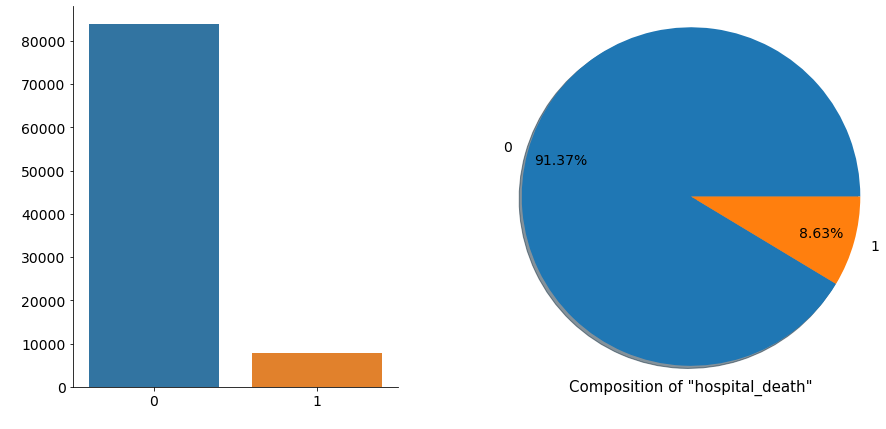

In [83]:
# checking the distribution of the target feature

plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=data['hospital_death'])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(data["hospital_death"].value_counts(),
        labels=list(data["hospital_death"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "hospital_death"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

### Numerical feature Analysis :

In [84]:
numerical=data.loc[:,data.dtypes!='object'].columns.tolist()[1:]
numerical

['age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprat

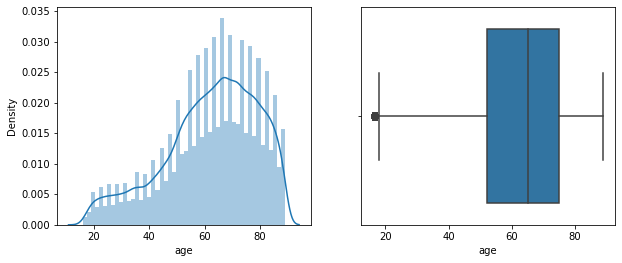

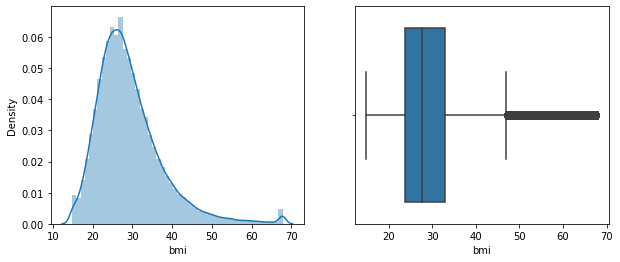

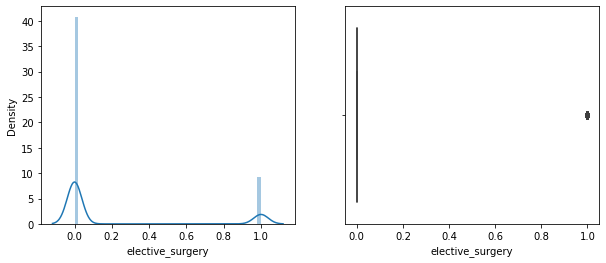

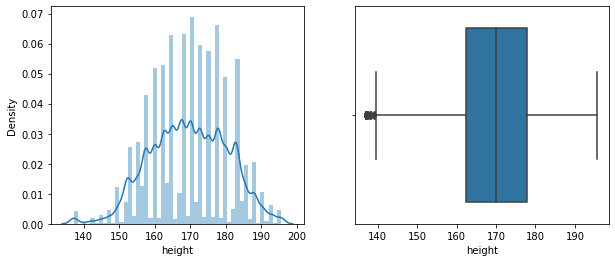

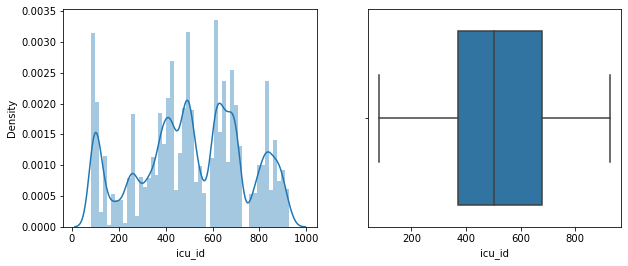

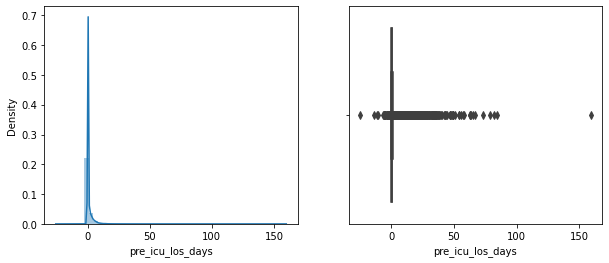

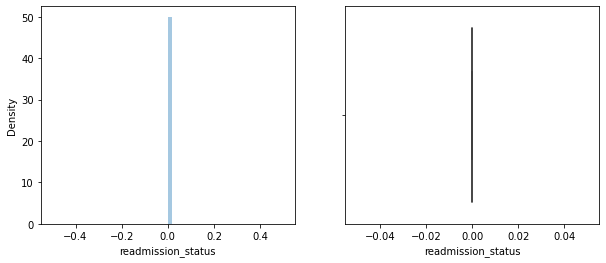

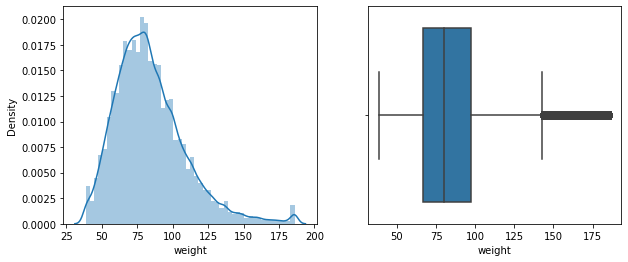

In [85]:
# plotting the distribution plot and box plot 


for col in ['age','bmi','elective_surgery','height','icu_id','pre_icu_los_days','readmission_status','weight']:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

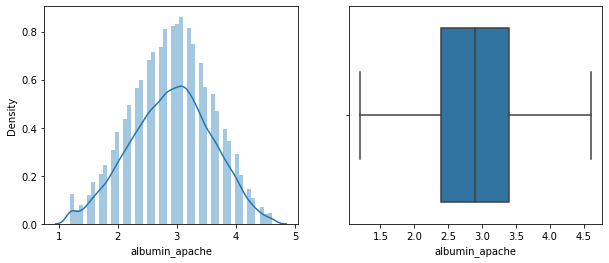

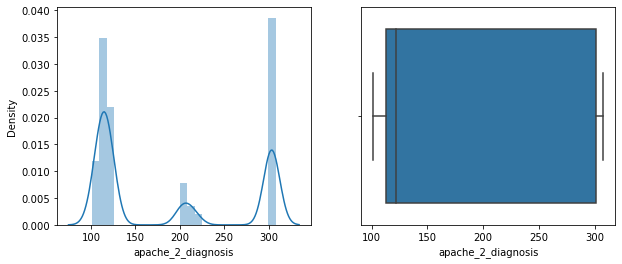

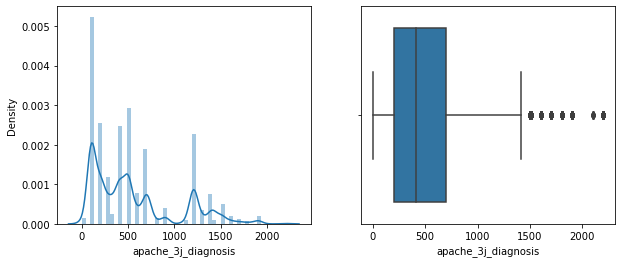

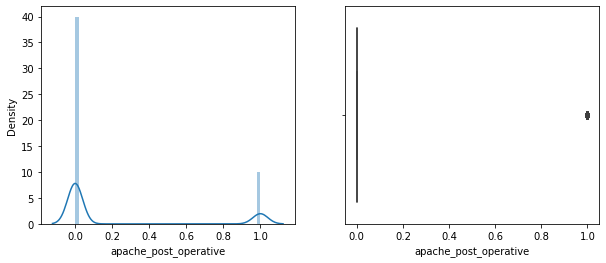

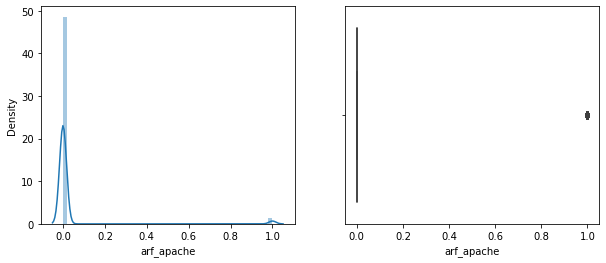

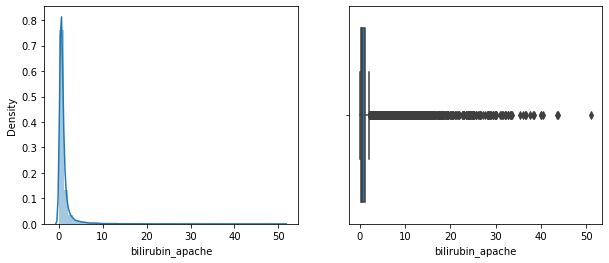

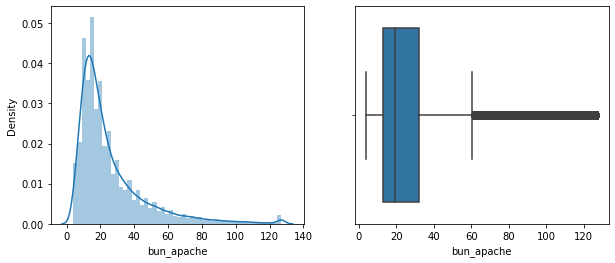

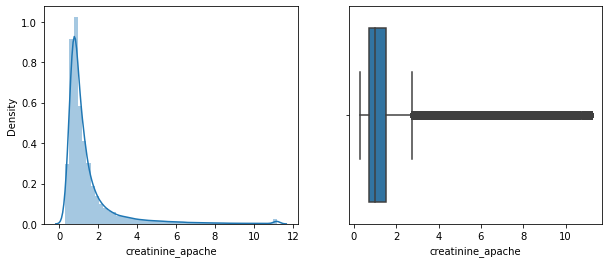

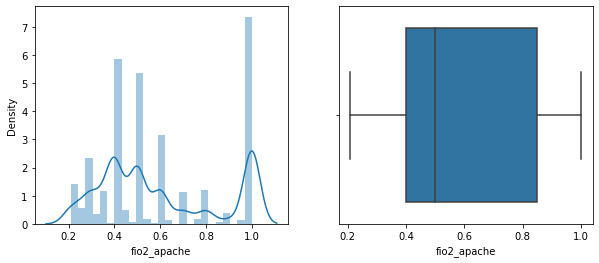

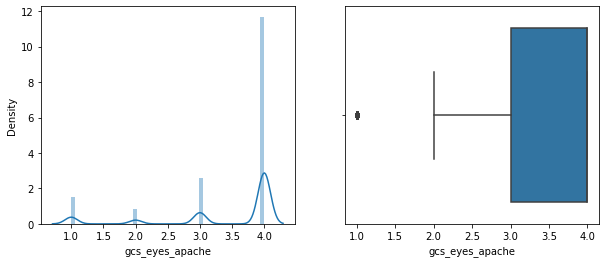

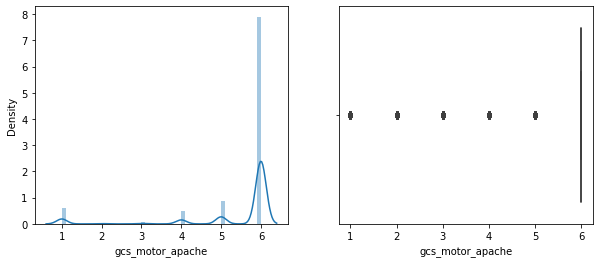

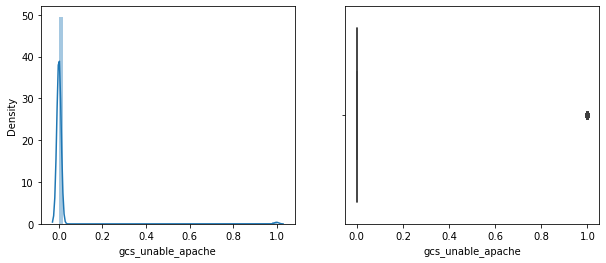

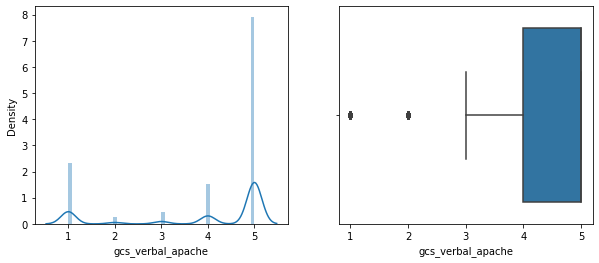

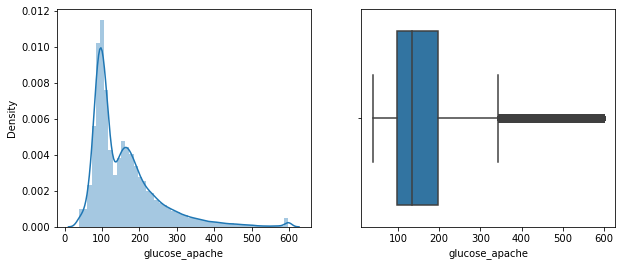

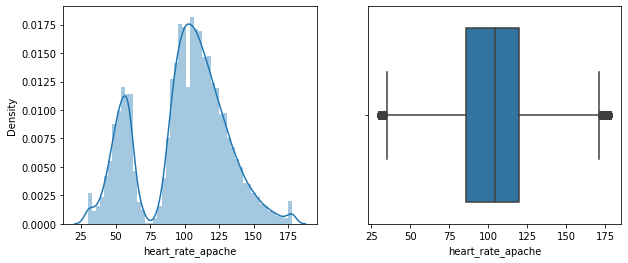

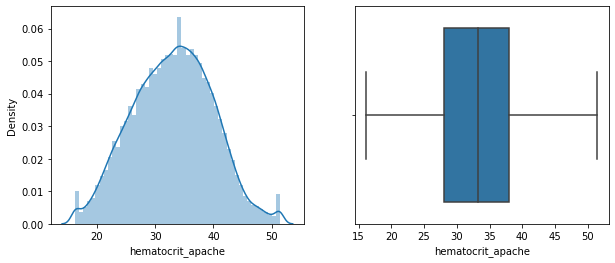

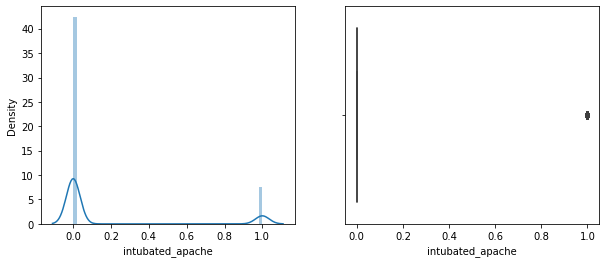

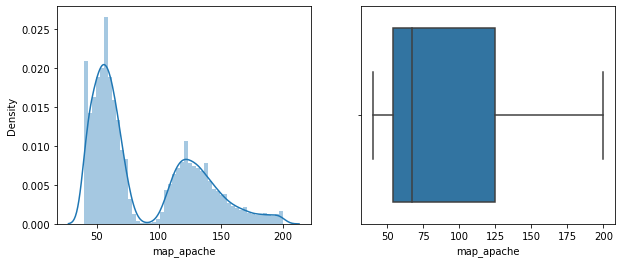

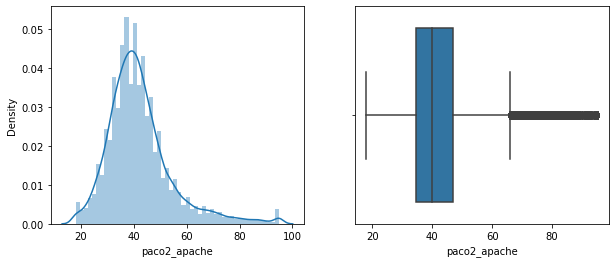

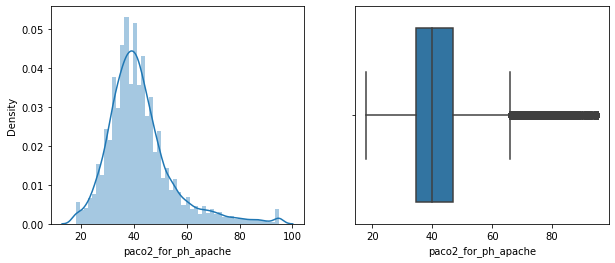

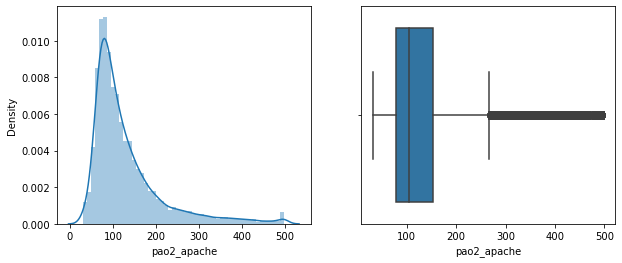

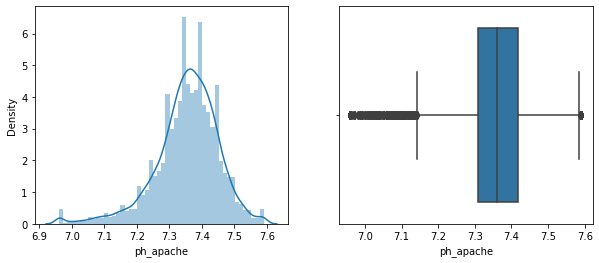

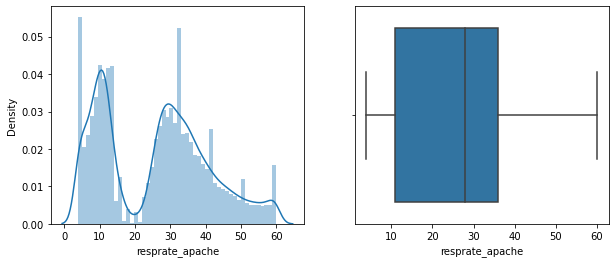

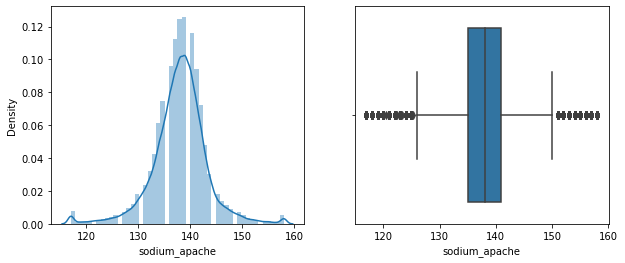

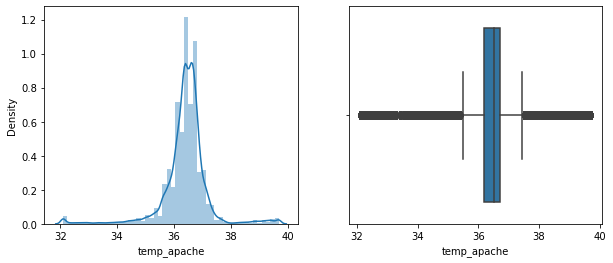

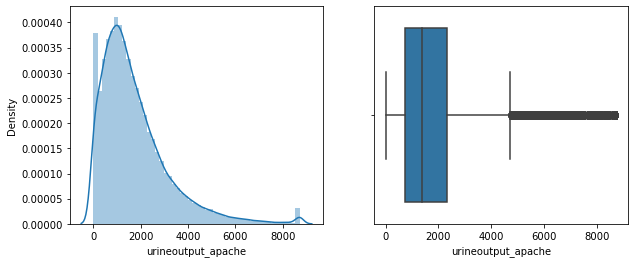

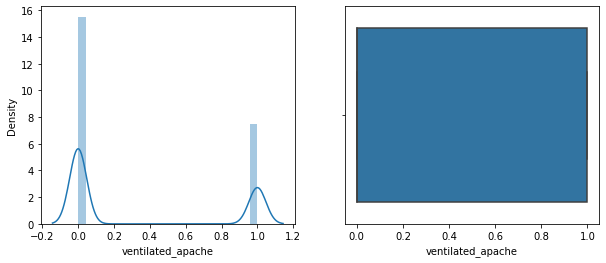

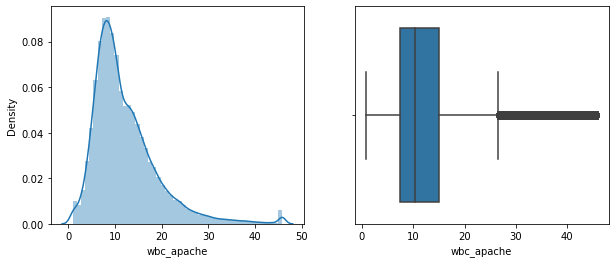

In [86]:
# analysing the apache covariate features

apache_covariate=['albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache','hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache']

for col in apache_covariate:
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

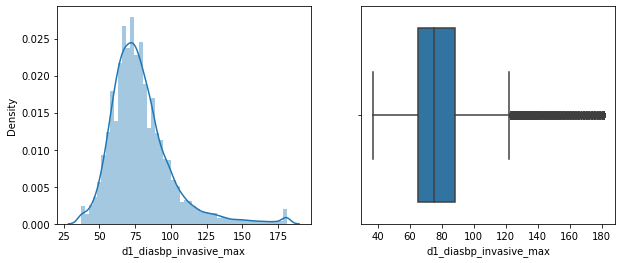

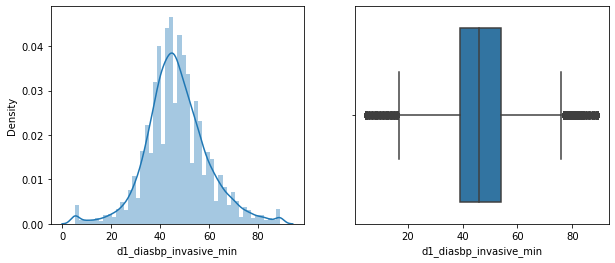

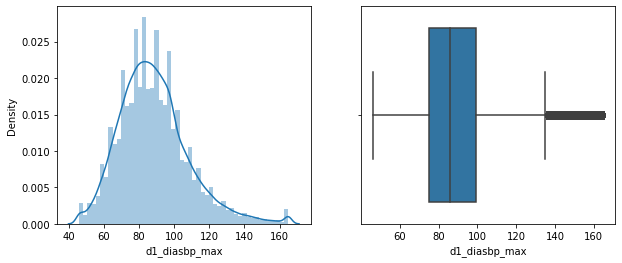

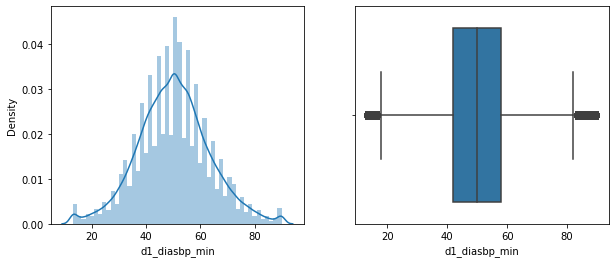

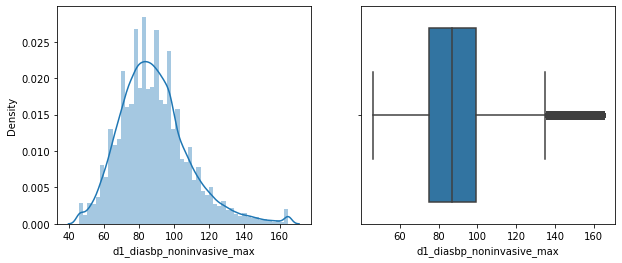

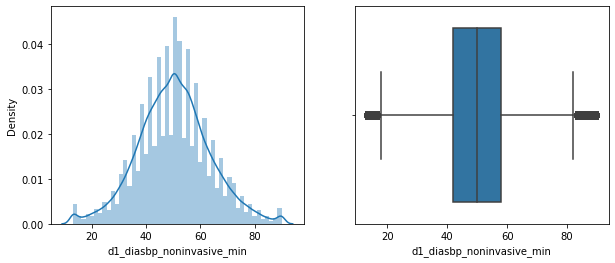

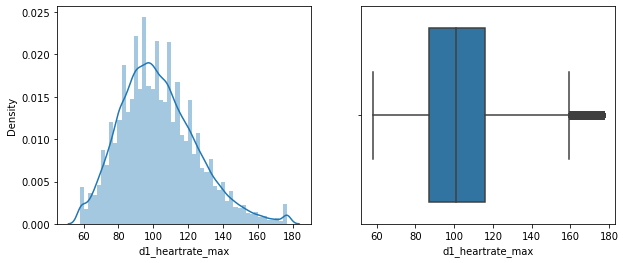

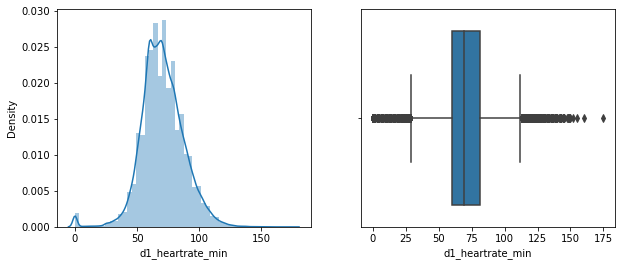

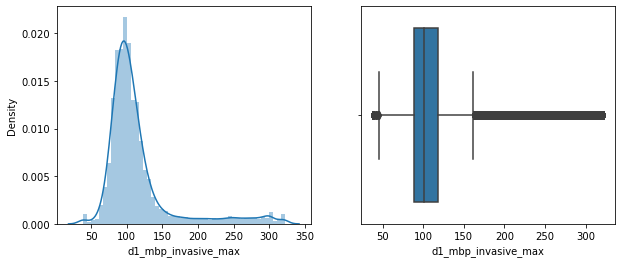

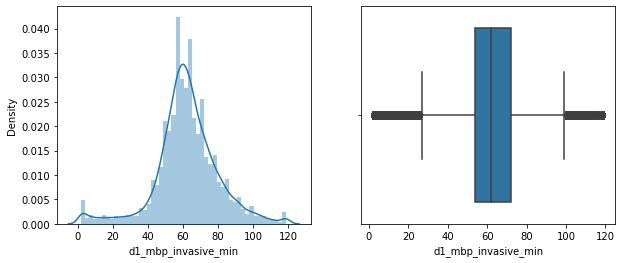

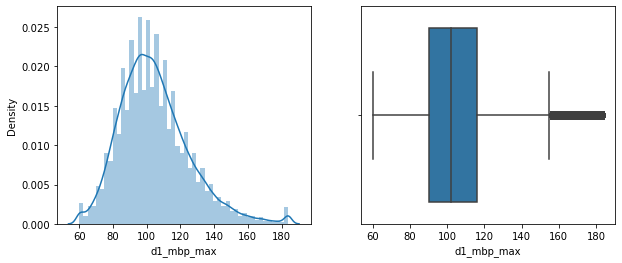

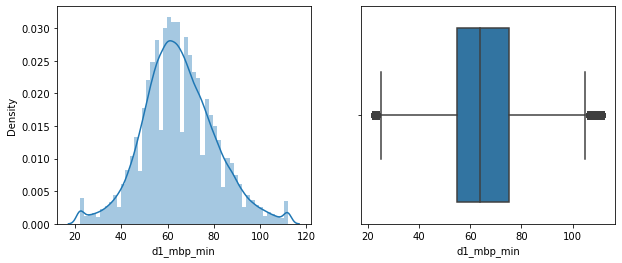

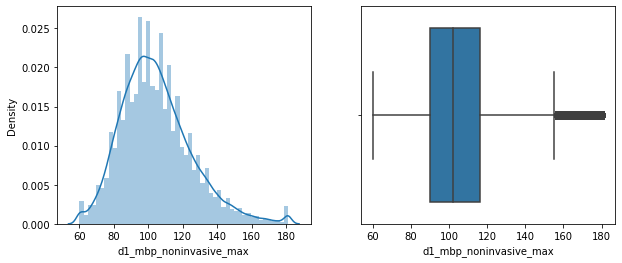

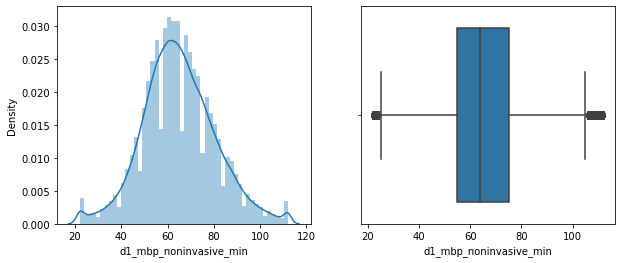

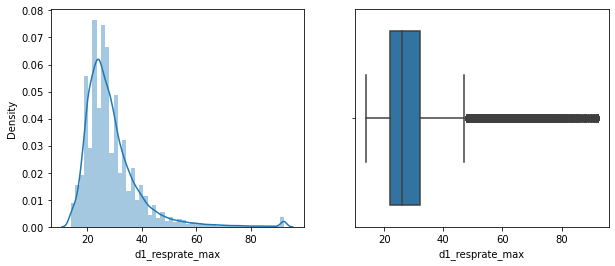

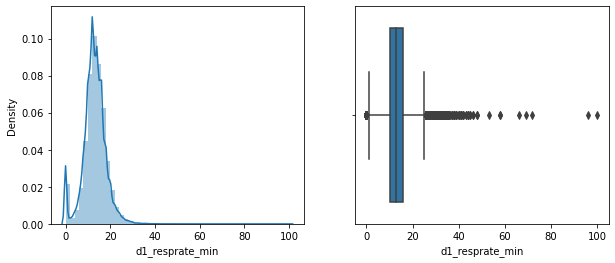

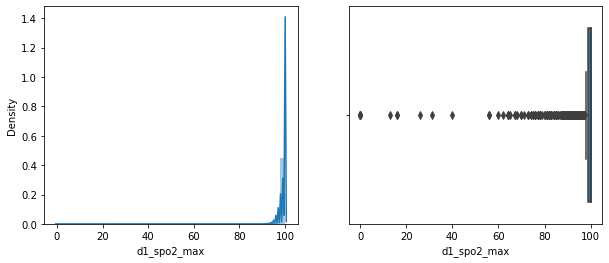

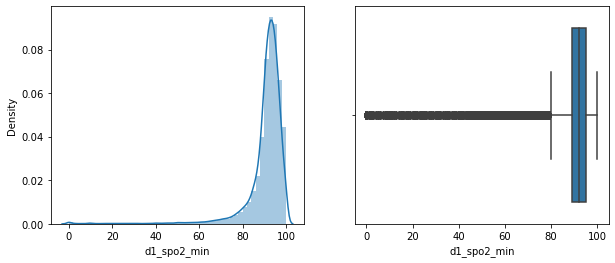

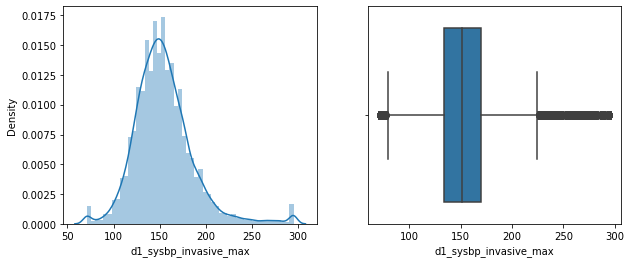

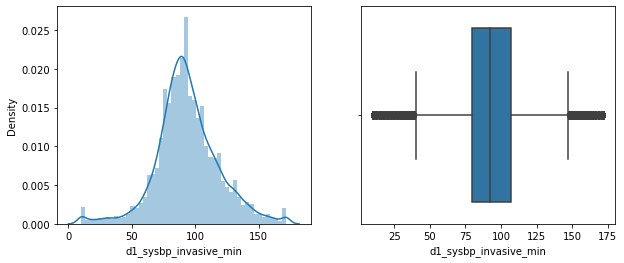

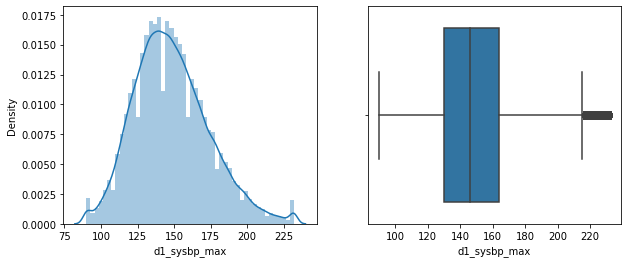

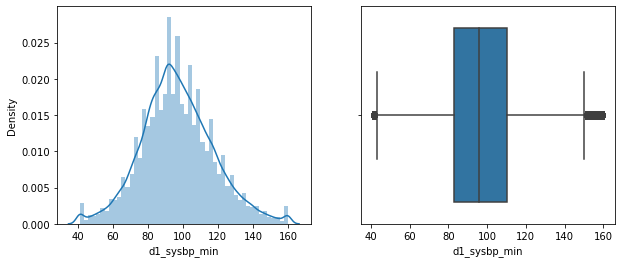

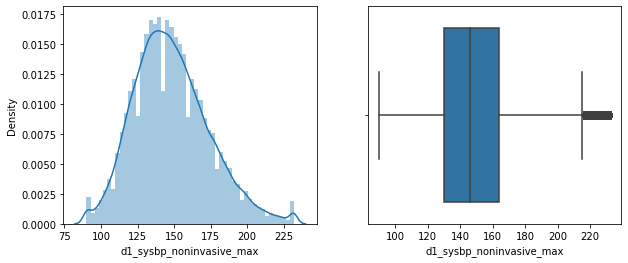

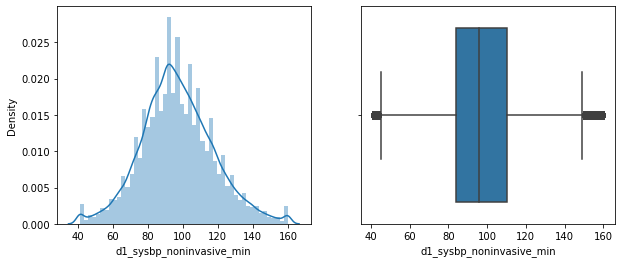

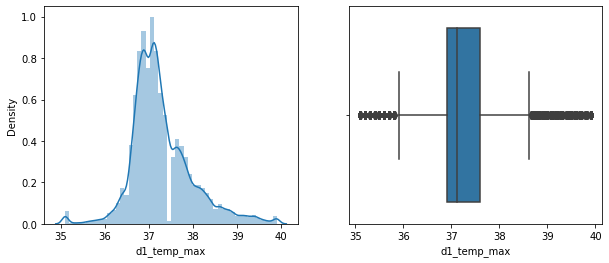

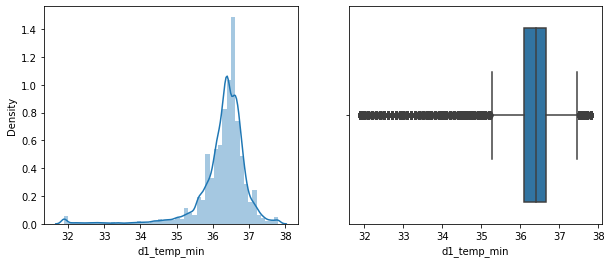

In [87]:
# Analysing the vitals features

vitals=['d1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min']

for col in vitals:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

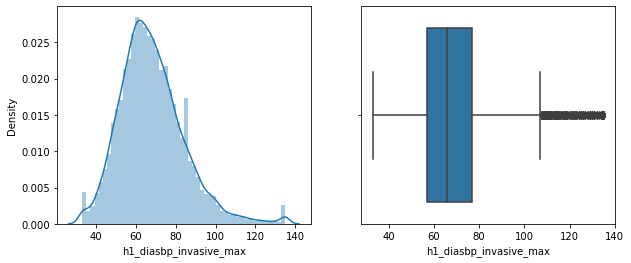

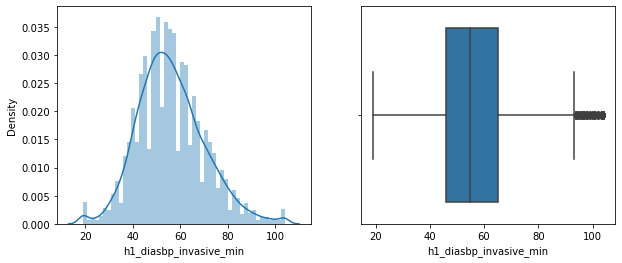

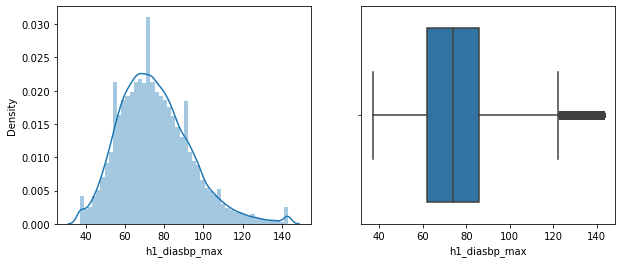

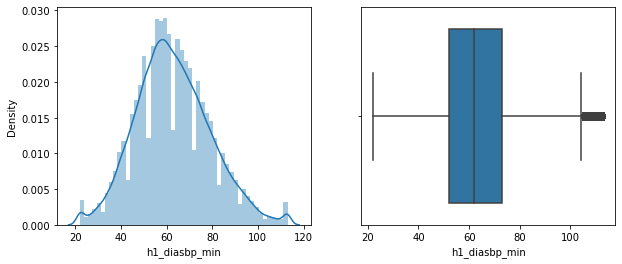

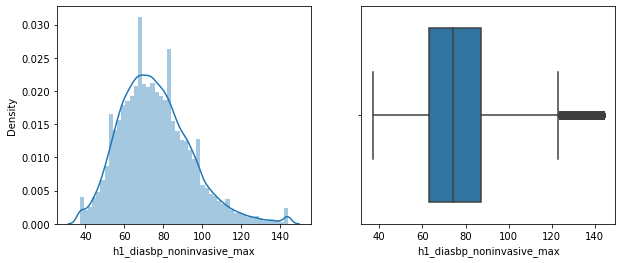

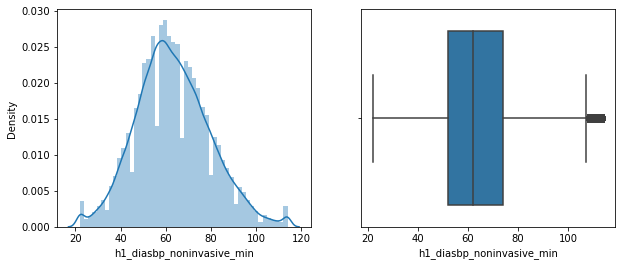

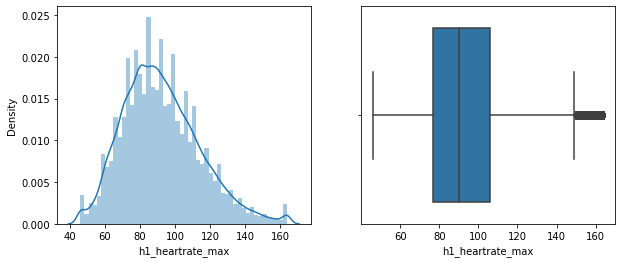

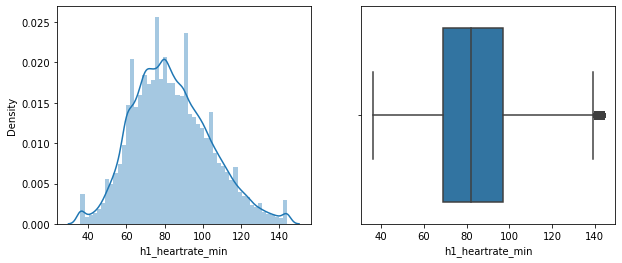

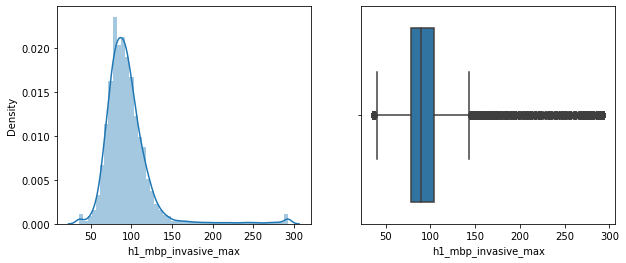

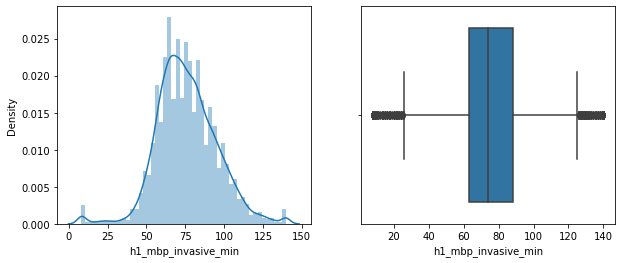

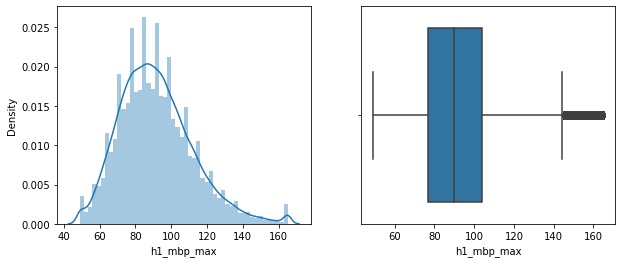

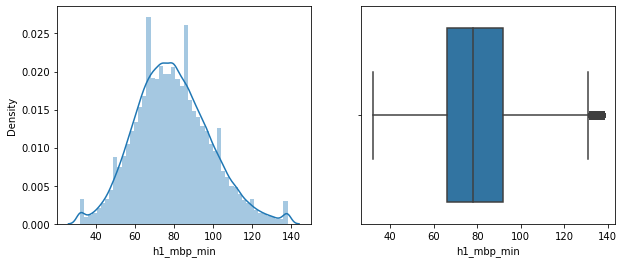

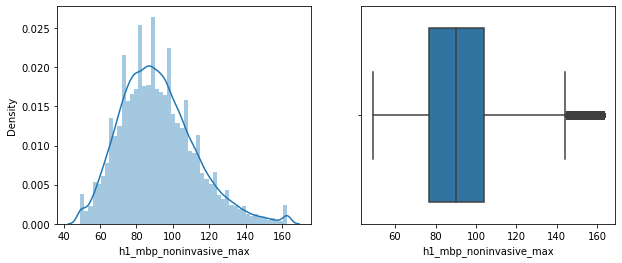

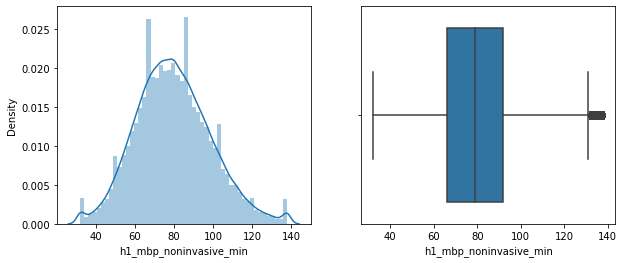

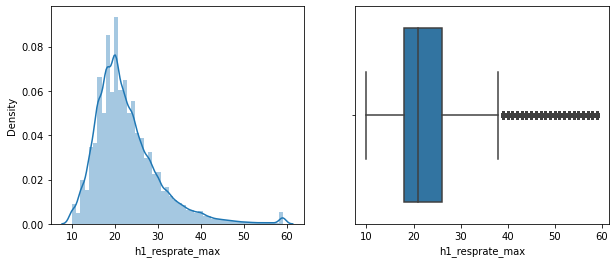

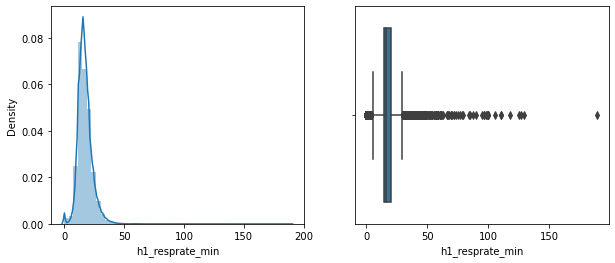

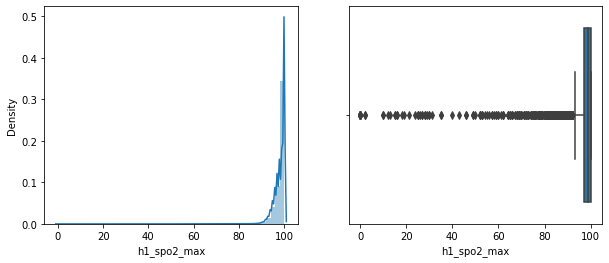

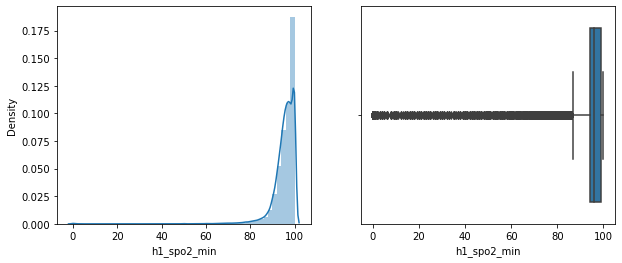

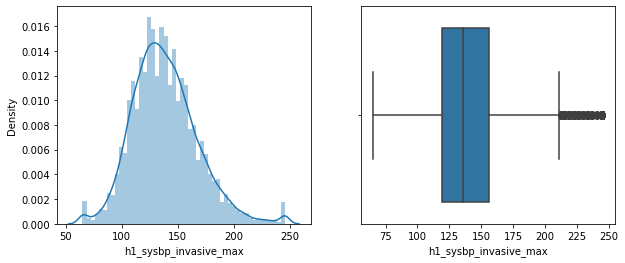

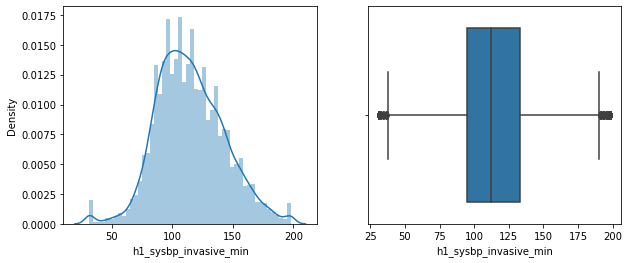

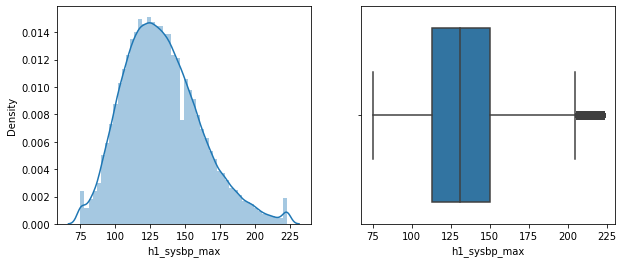

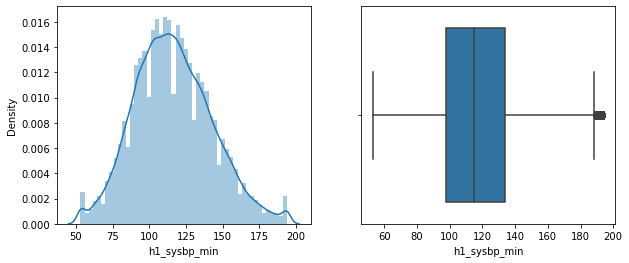

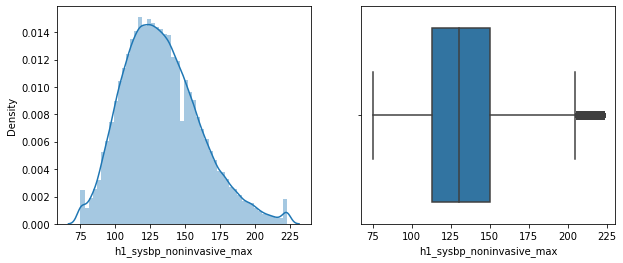

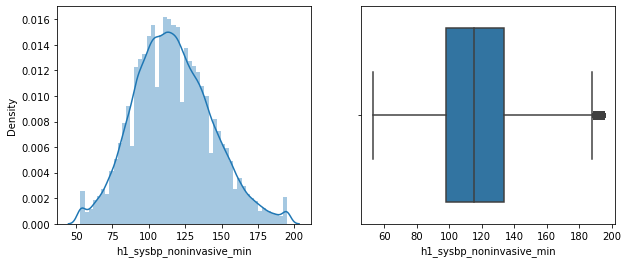

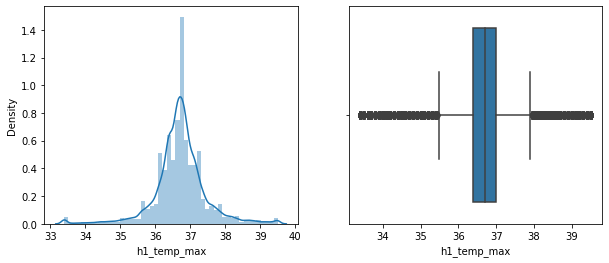

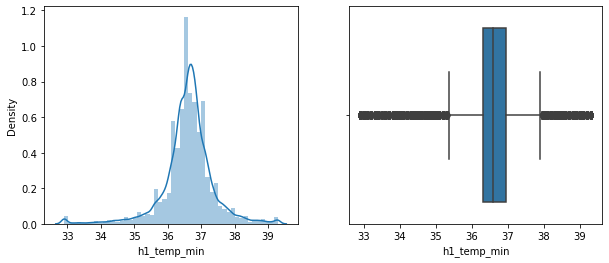

In [88]:
# Analysing the vitals features

vitals=['h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min']

for col in vitals:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

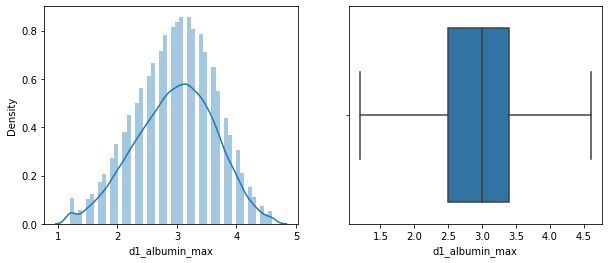

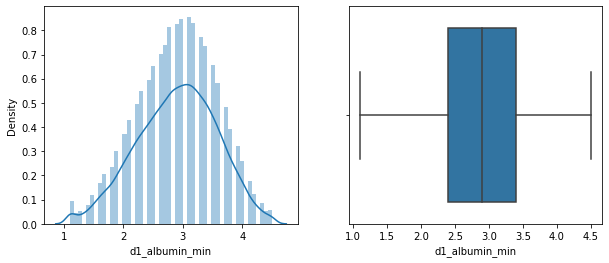

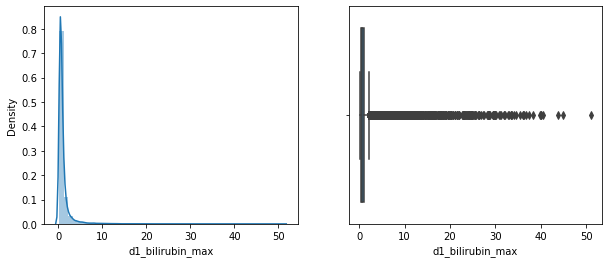

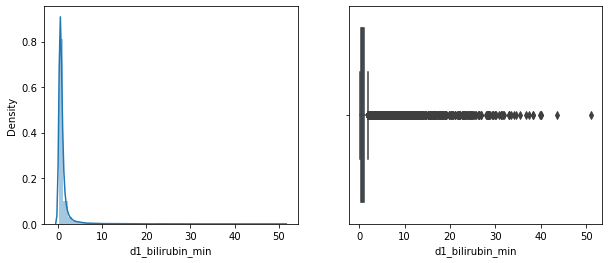

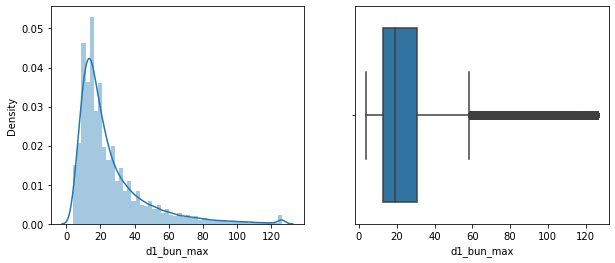

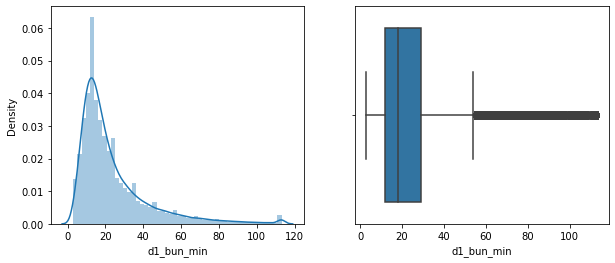

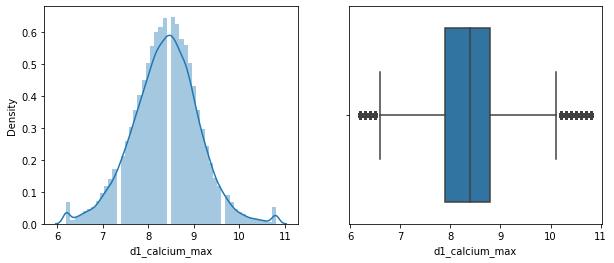

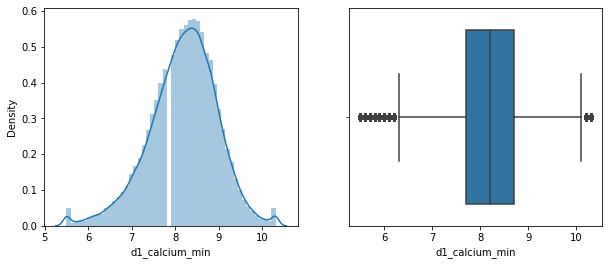

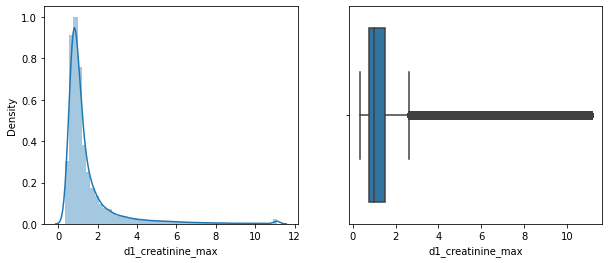

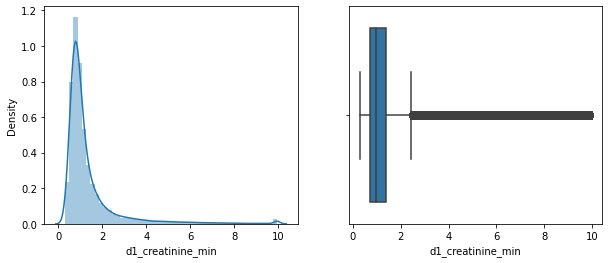

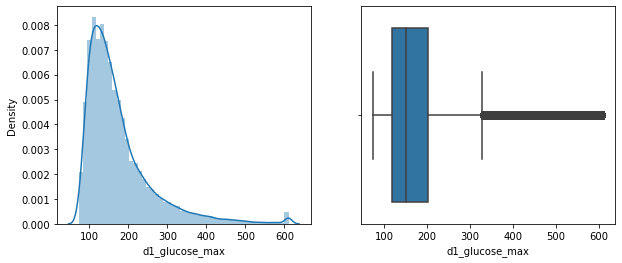

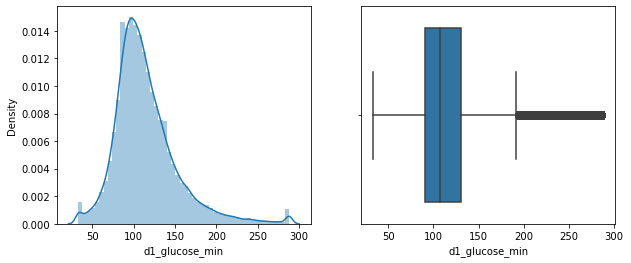

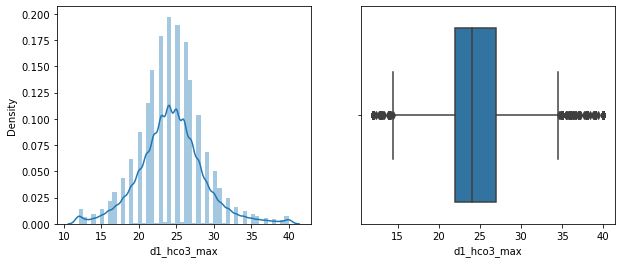

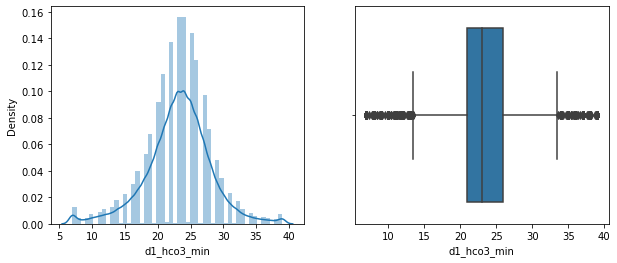

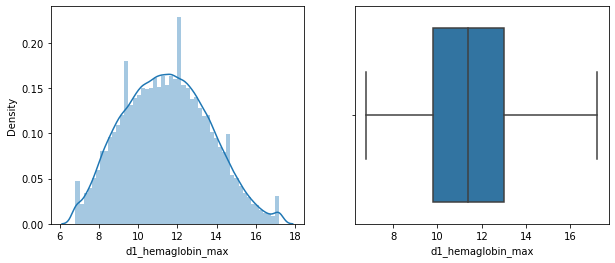

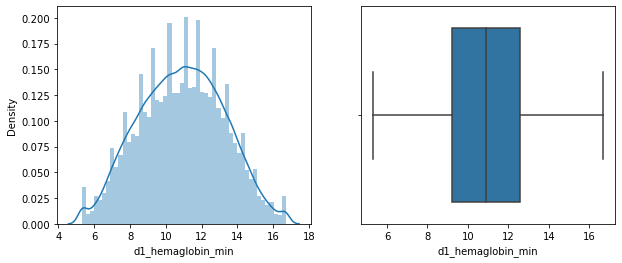

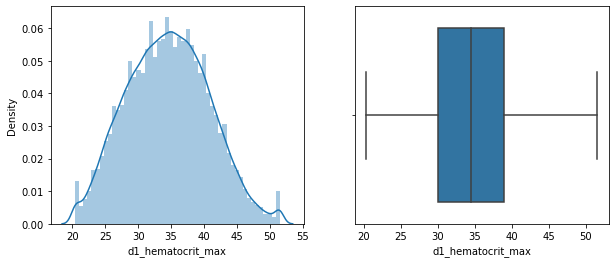

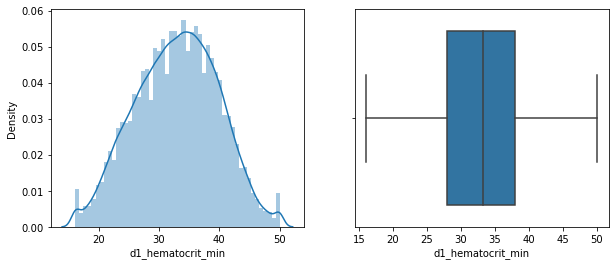

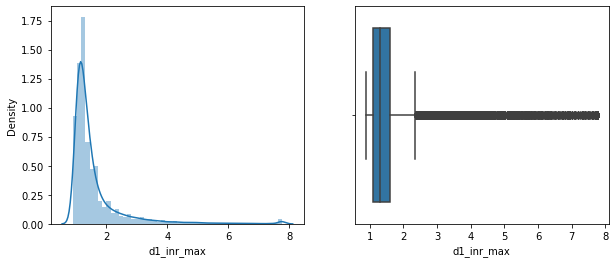

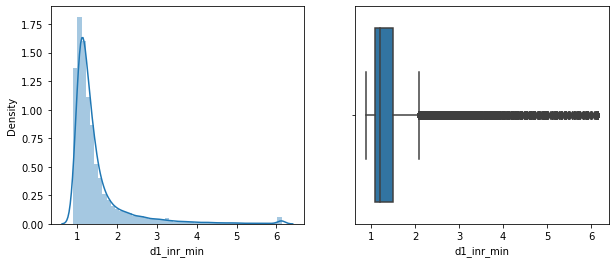

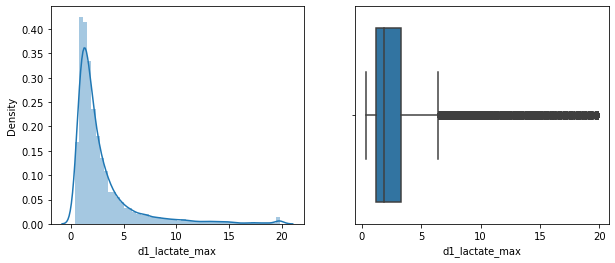

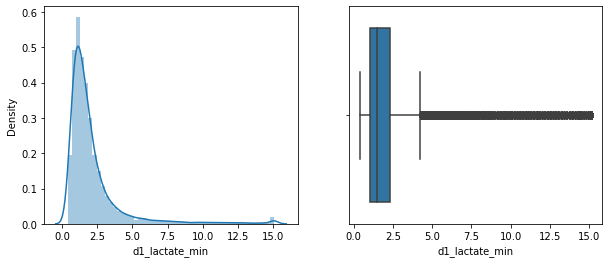

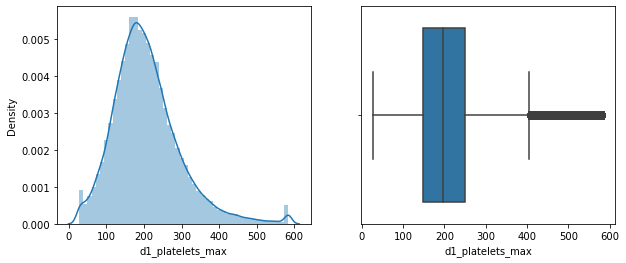

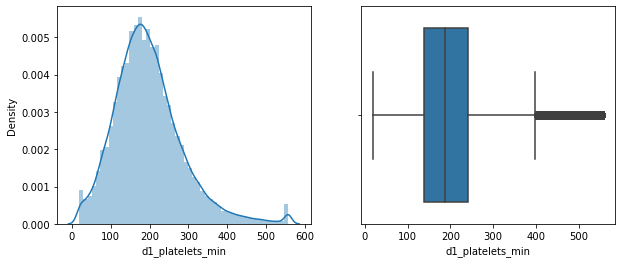

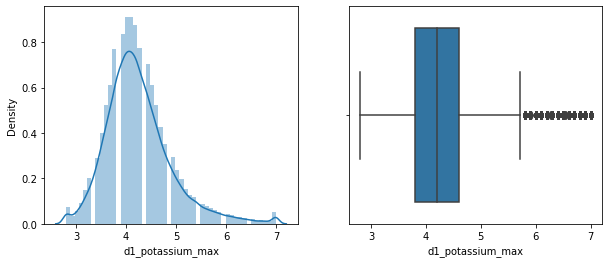

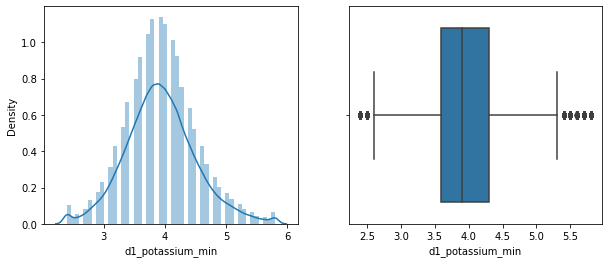

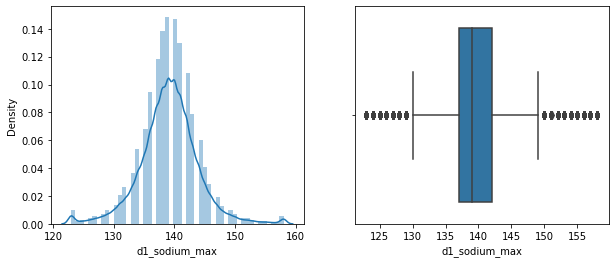

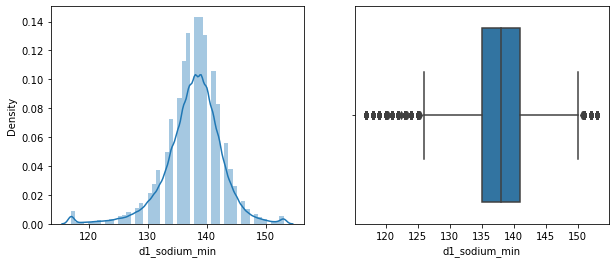

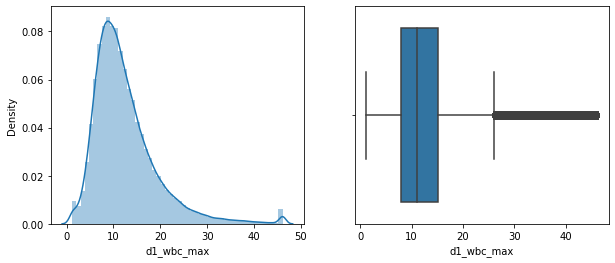

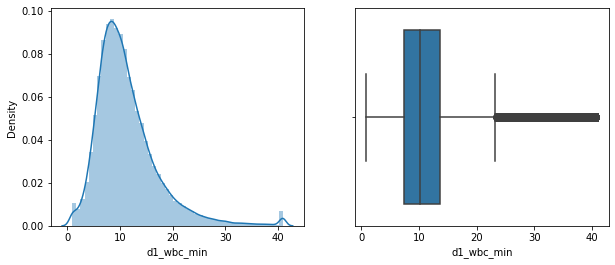

In [89]:
#Analysing the labs features

labs=['d1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min']

for col in labs:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

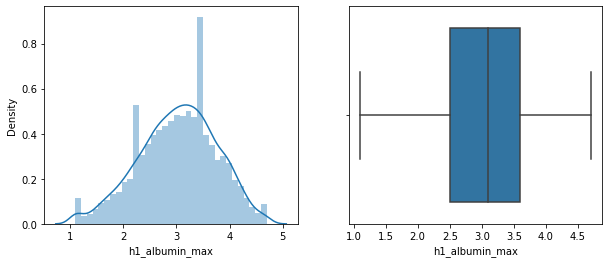

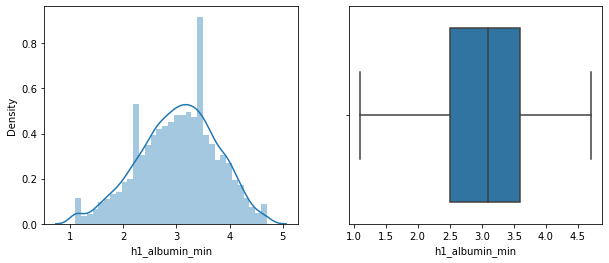

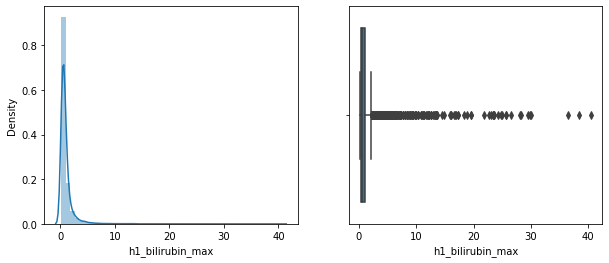

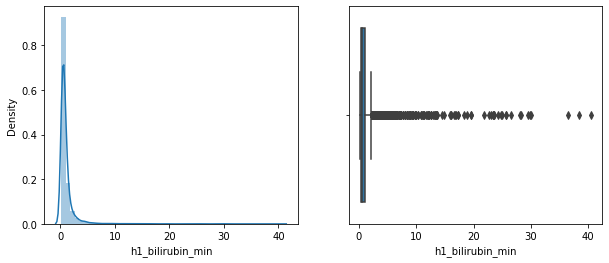

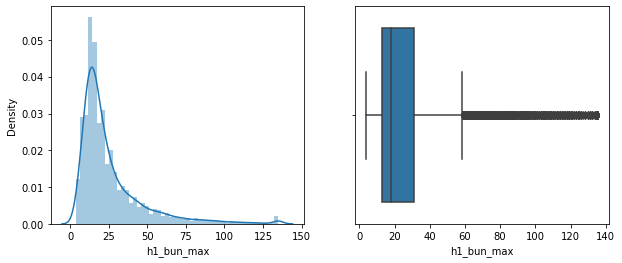

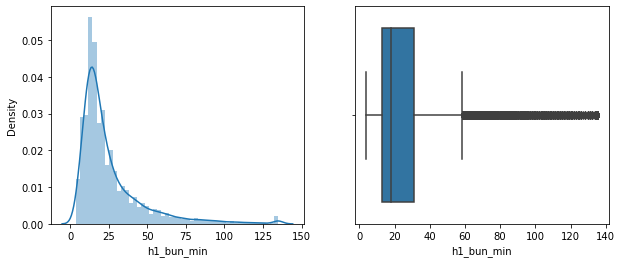

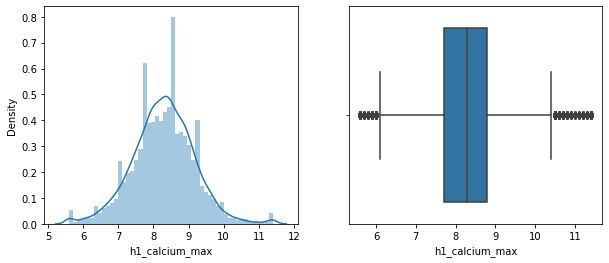

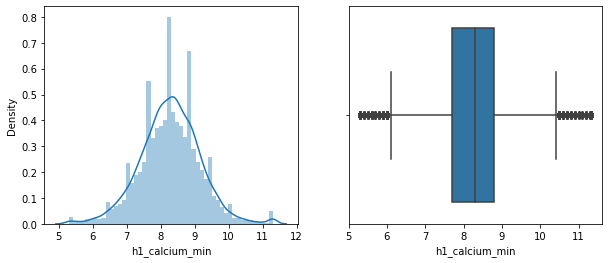

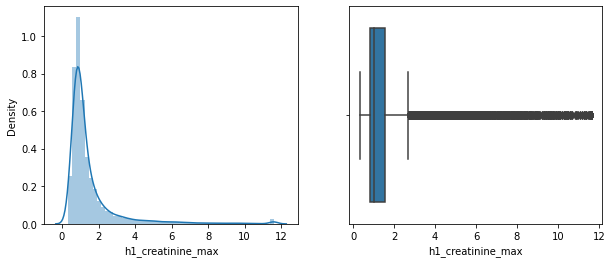

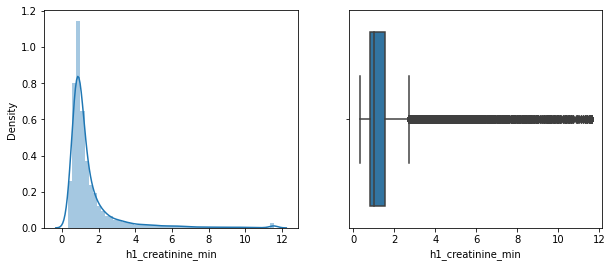

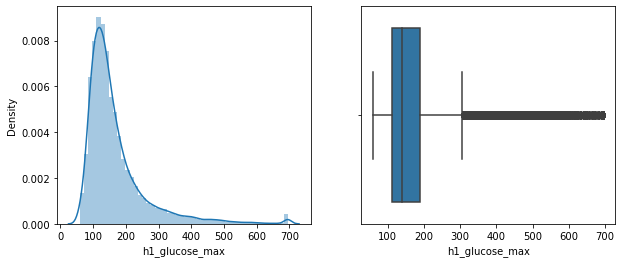

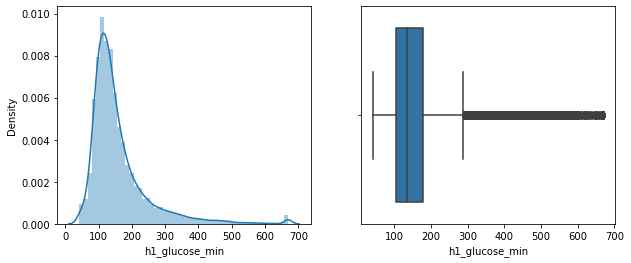

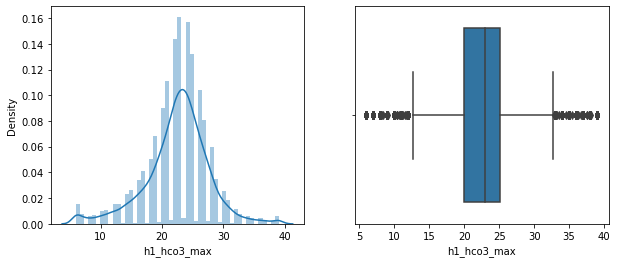

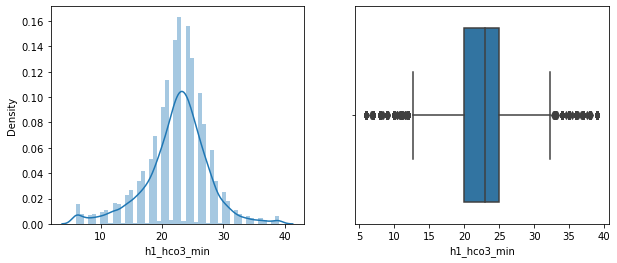

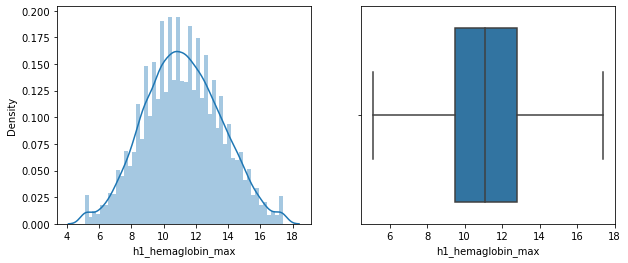

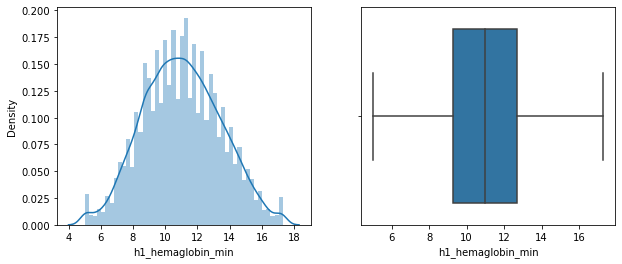

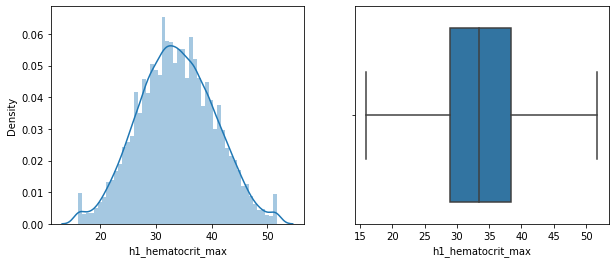

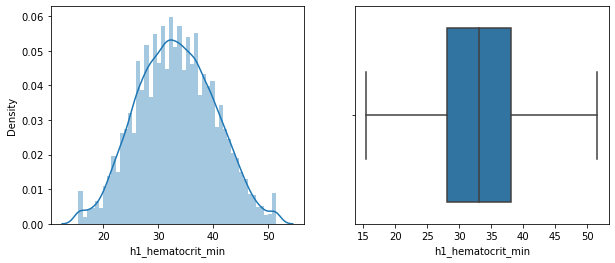

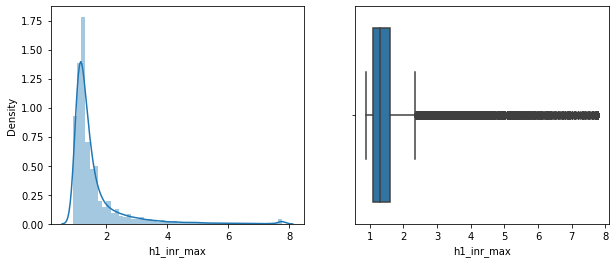

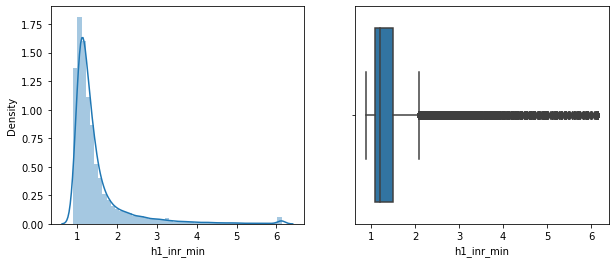

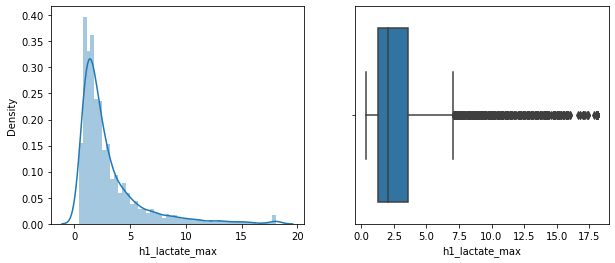

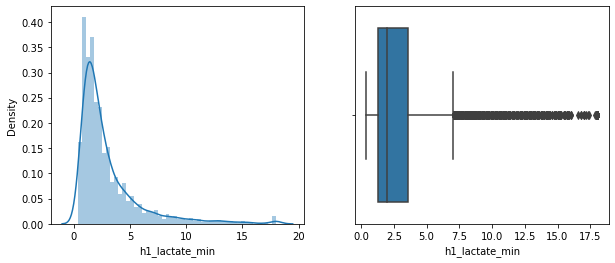

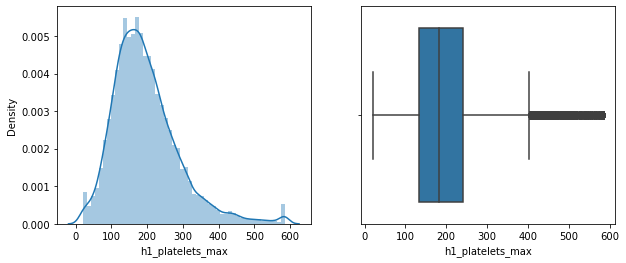

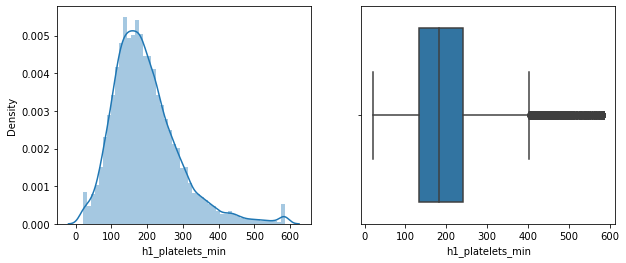

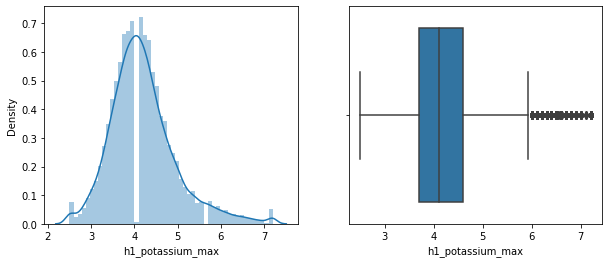

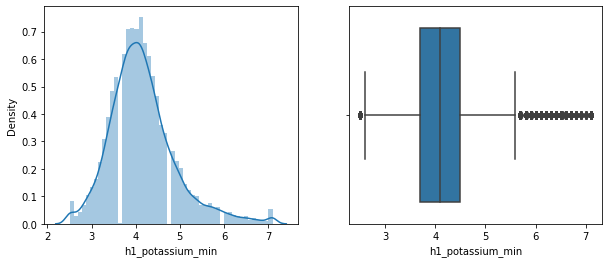

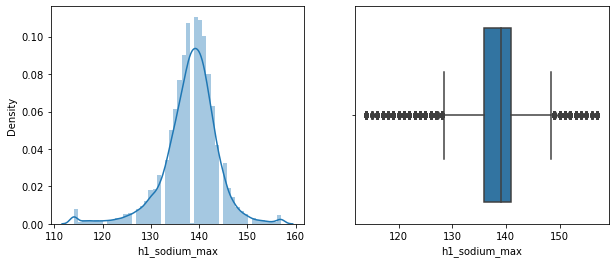

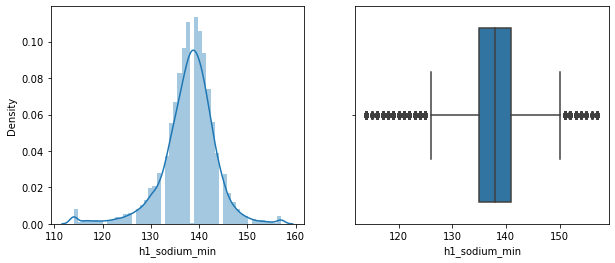

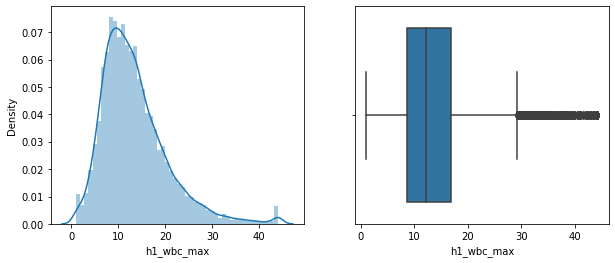

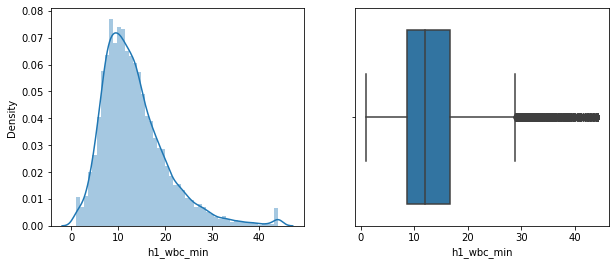

In [90]:
# Analysing the labs features
labs=['h1_albumin_max',
 'h1_albumin_min',
 'h1_bilirubin_max',
 'h1_bilirubin_min',
 'h1_bun_max',
 'h1_bun_min',
 'h1_calcium_max',
 'h1_calcium_min',
 'h1_creatinine_max',
 'h1_creatinine_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'h1_hco3_max',
 'h1_hco3_min',
 'h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'h1_inr_max',
 'h1_inr_min',
 'h1_lactate_max',
 'h1_lactate_min',
 'h1_platelets_max',
 'h1_platelets_min',
 'h1_potassium_max',
 'h1_potassium_min',
 'h1_sodium_max',
 'h1_sodium_min',
 'h1_wbc_max',
 'h1_wbc_min']

for col in labs:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

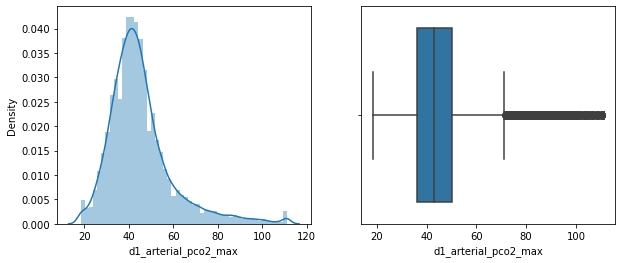

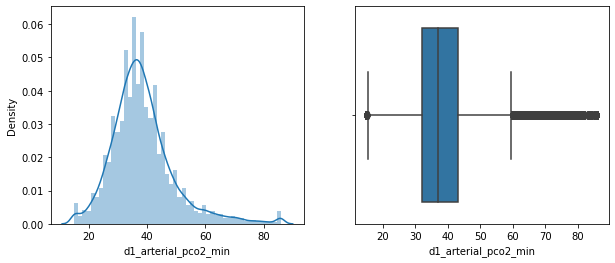

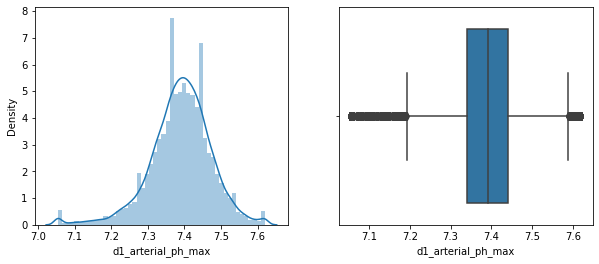

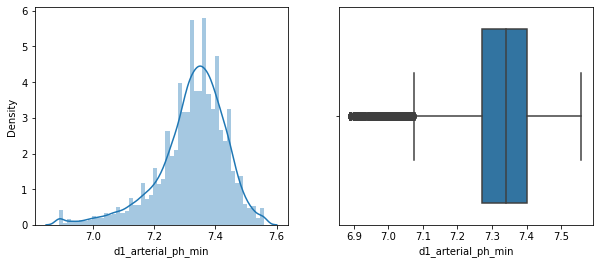

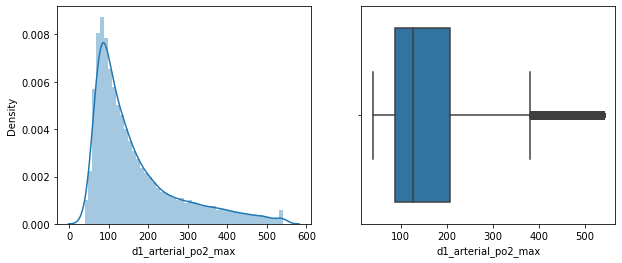

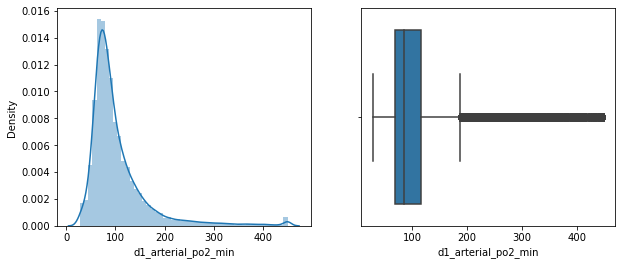

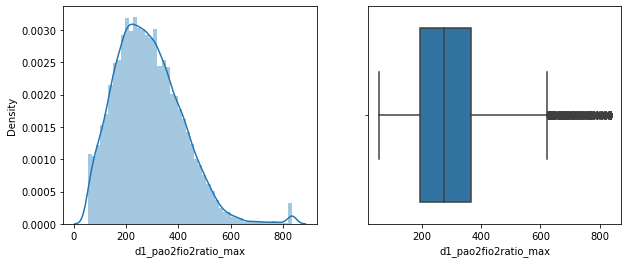

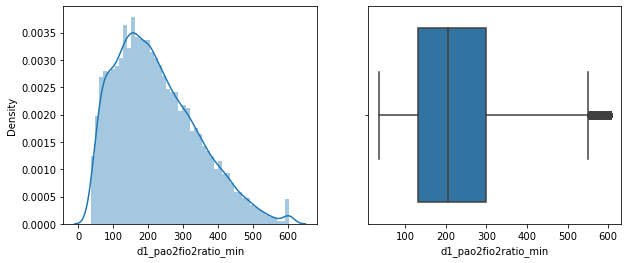

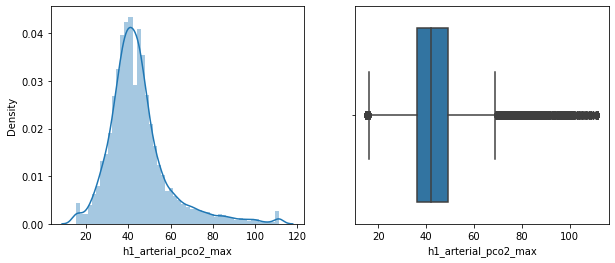

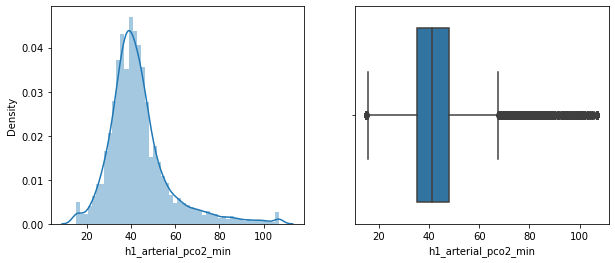

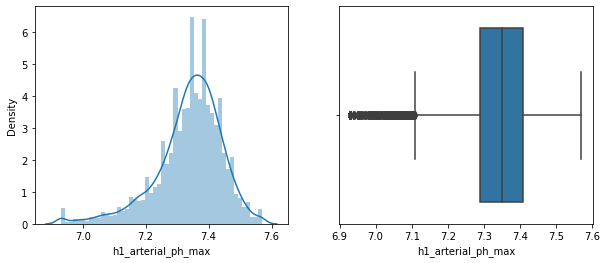

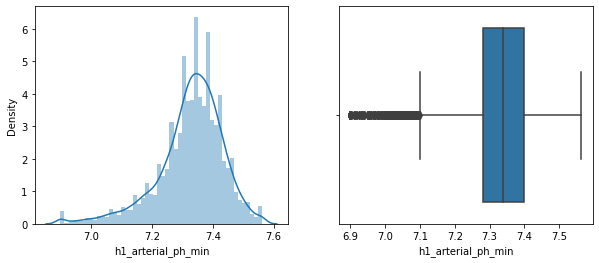

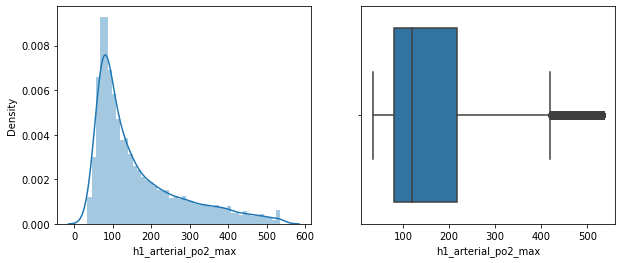

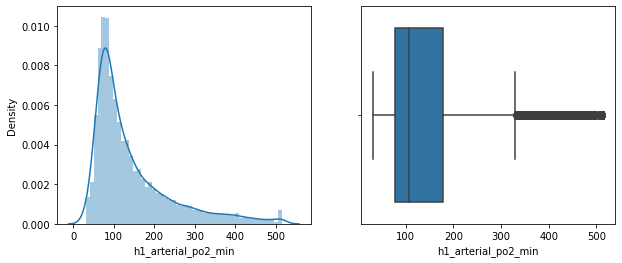

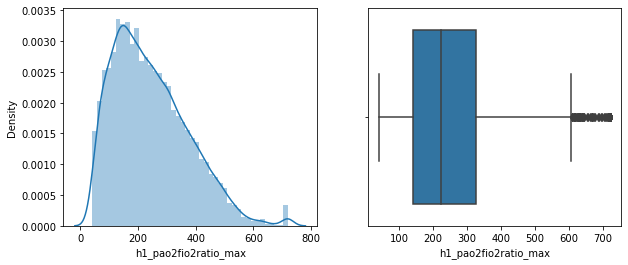

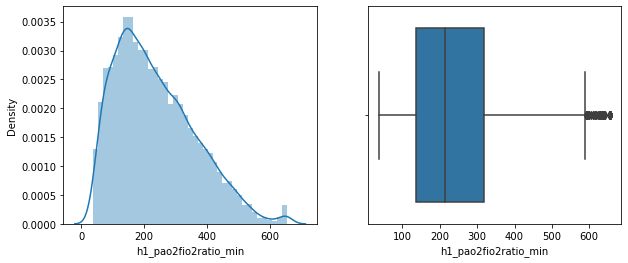

In [91]:
# analysing the labs blood gas features

labs_blood=['d1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'h1_arterial_pco2_max',
 'h1_arterial_pco2_min',
 'h1_arterial_ph_max',
 'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

for col in labs_blood:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

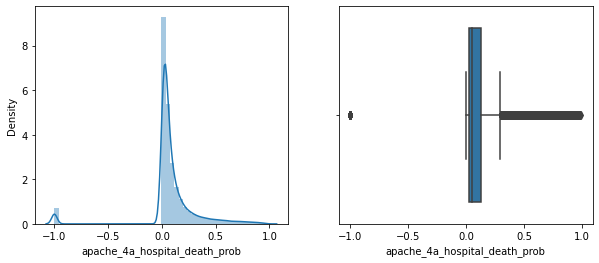

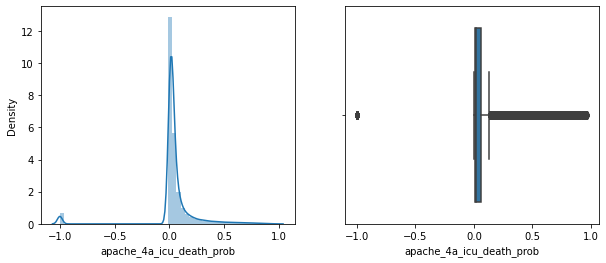

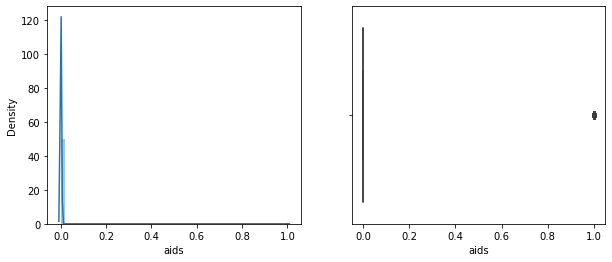

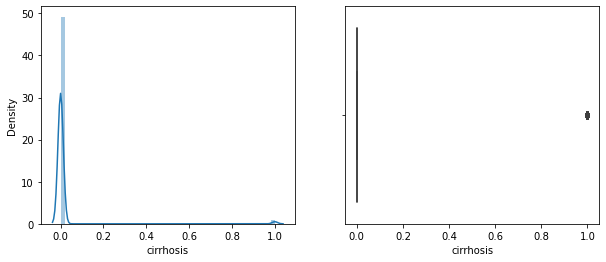

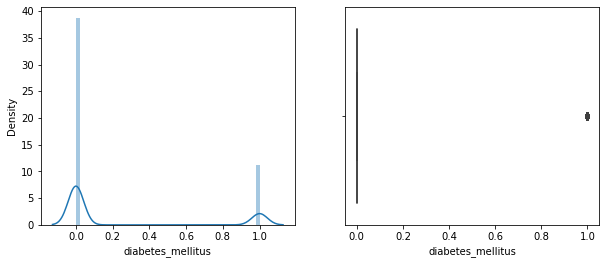

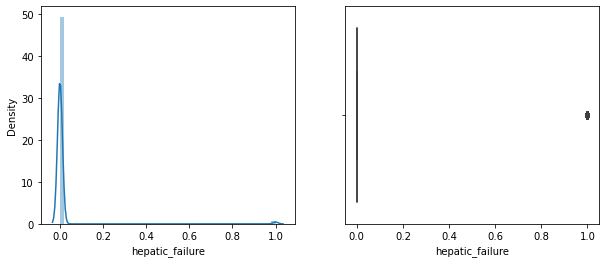

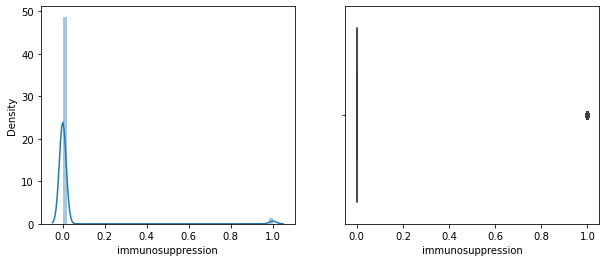

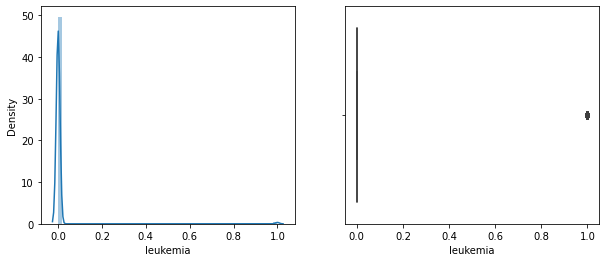

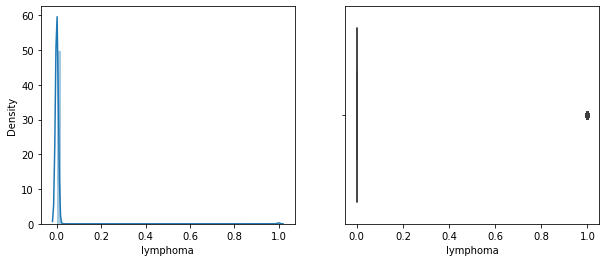

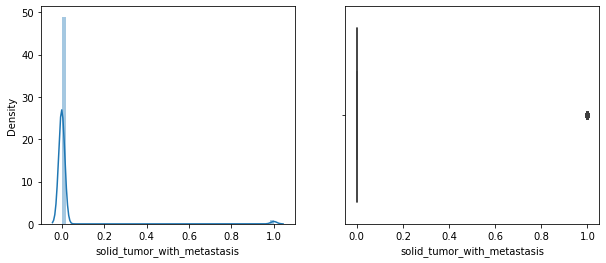

In [92]:
# Analysing the other features like apache prediction,apache comorbidity,apache grouping 
other=['apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

for col in other:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    sns.distplot( data[col],kde=True, ax=ax[0])
    sns.boxplot(data[col], ax=ax[1])

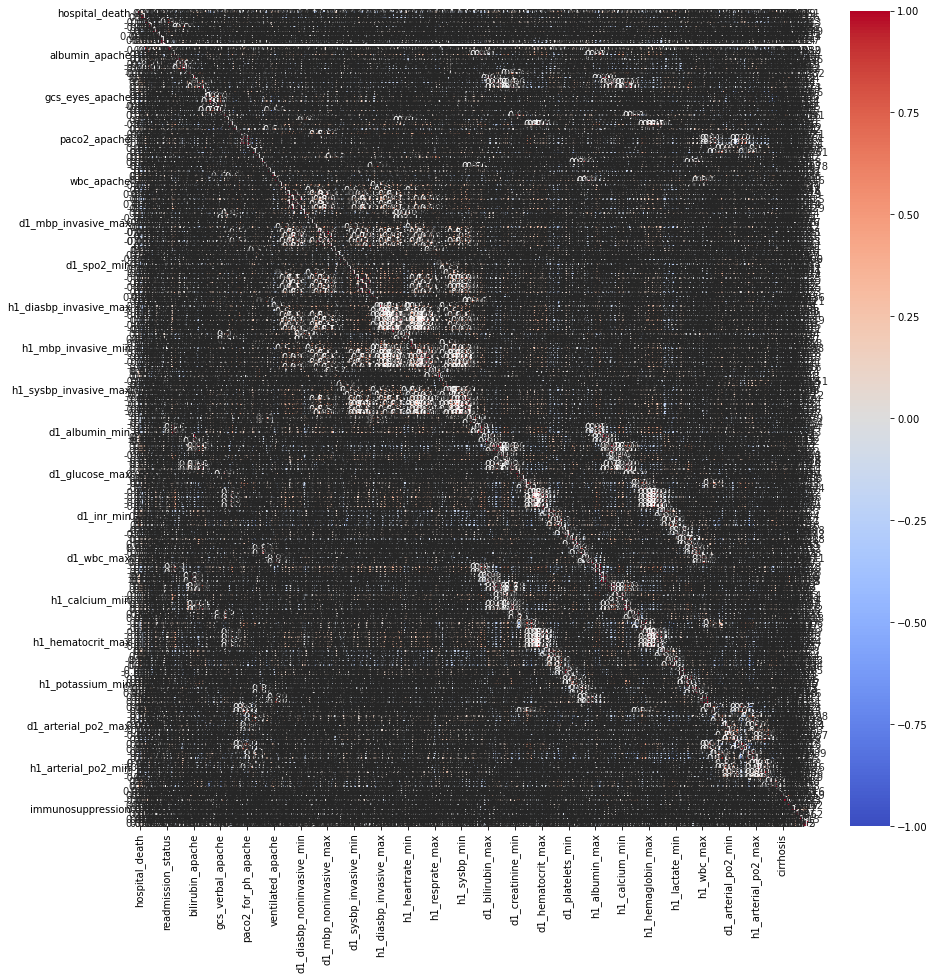

In [93]:
# plotting the correlation matrix



graph=sns.heatmap(correlations, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
graph.figure.set_size_inches(15,15)

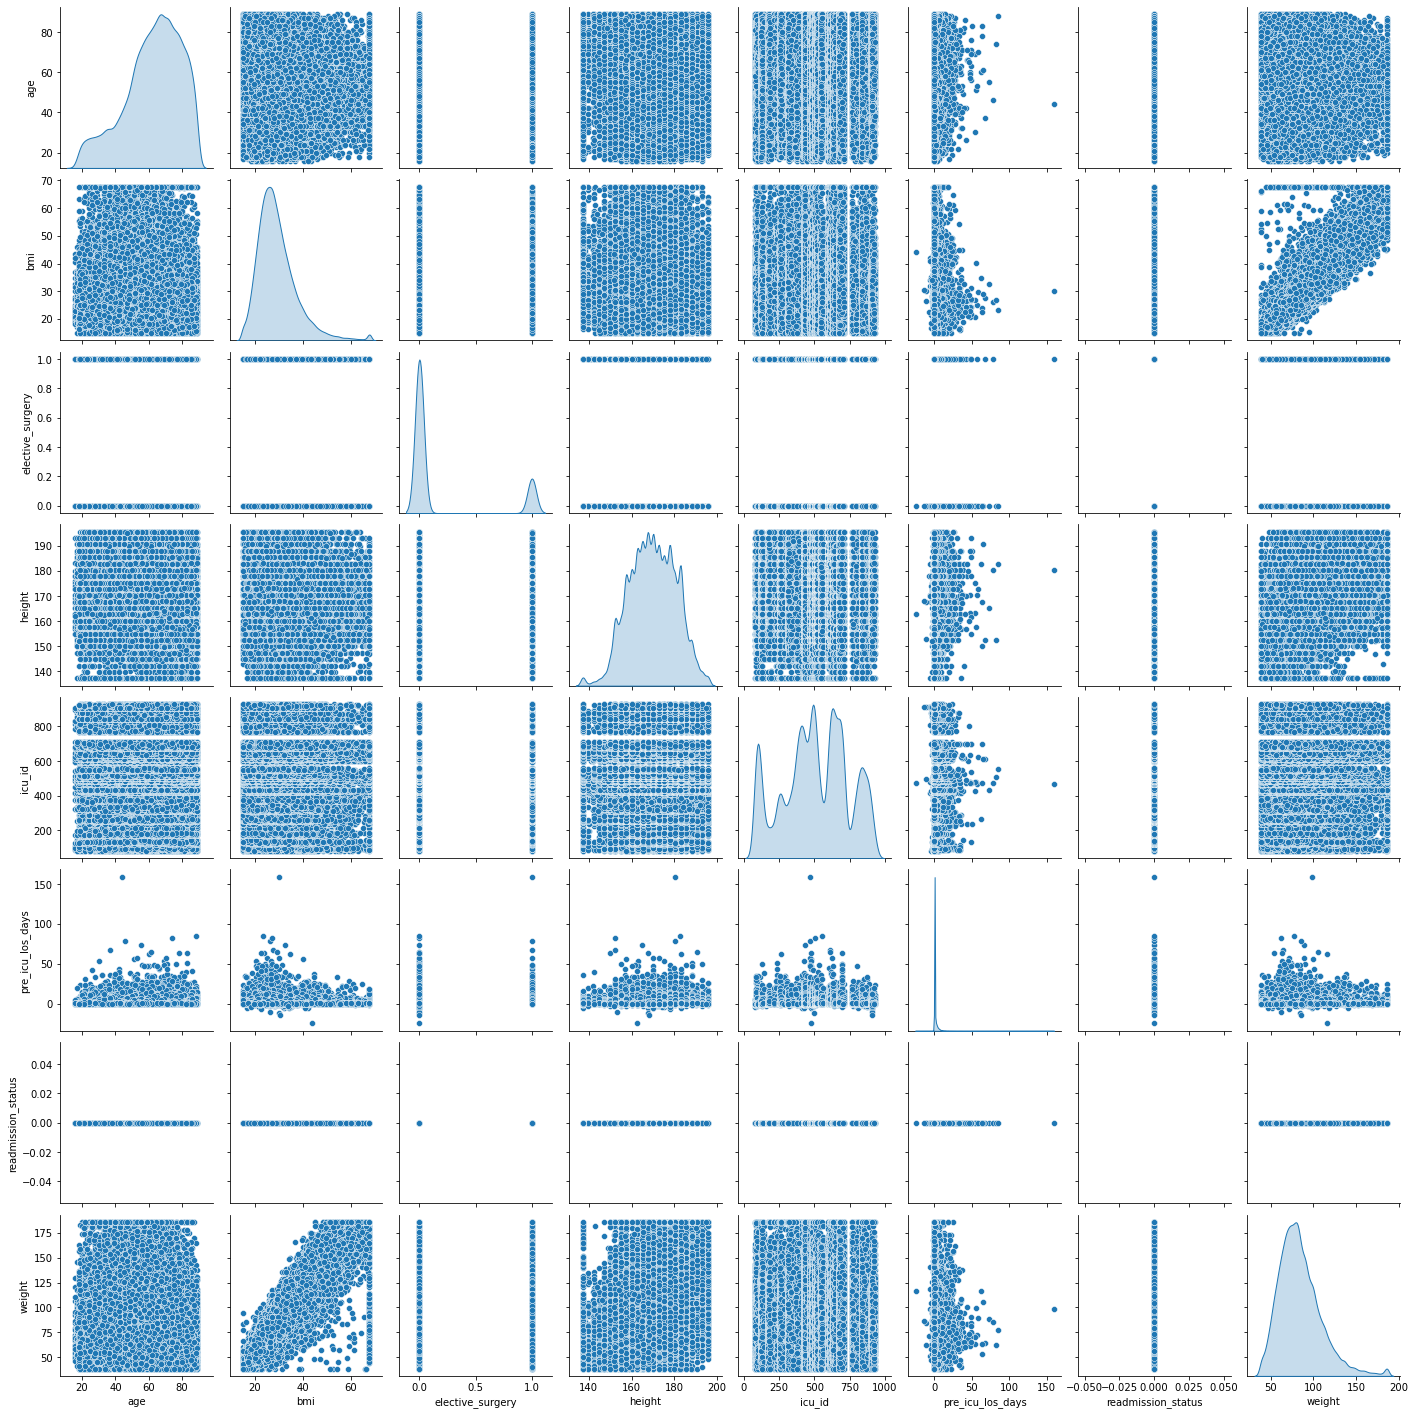

In [94]:
# plotting the scatter  plots 

sns.pairplot(data[['age','bmi','elective_surgery','height','icu_id','pre_icu_los_days','readmission_status','weight']],diag_kind='kde',kind='scatter',palette='husl')

### Categorical data Analysis:

In [95]:
categorical= data.loc[:,data.dtypes=='object'].columns.tolist()
categorical

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

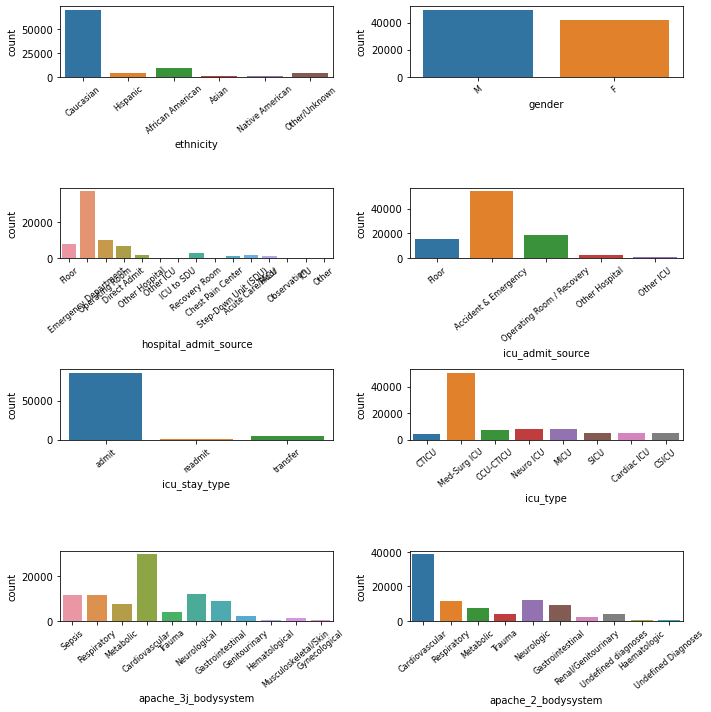

In [96]:

plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40, fontsize=8)
    
plt.tight_layout()
    

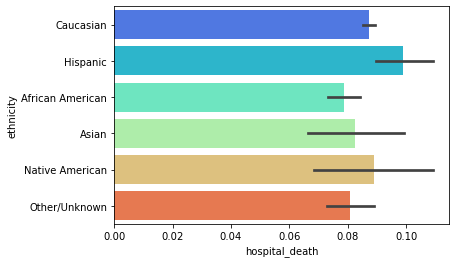

In [97]:
sns.barplot(data=data,y=categorical[0],x='hospital_death',palette='rainbow')

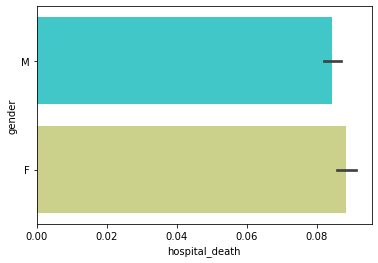

In [98]:
sns.barplot(data=data,y=categorical[1],x='hospital_death',palette='rainbow')

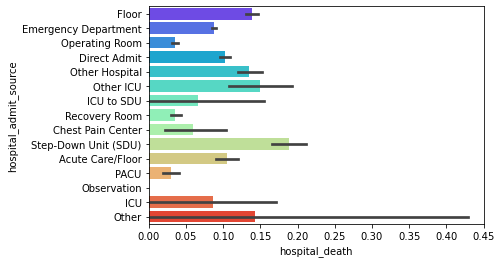

In [99]:
sns.barplot(data=data,y=categorical[2],x='hospital_death',palette='rainbow')

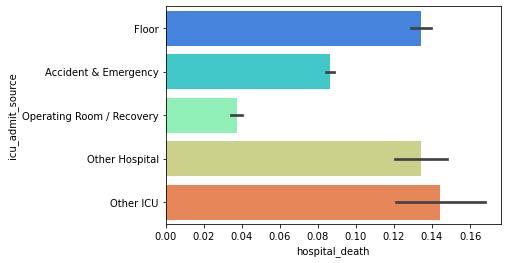

In [100]:
sns.barplot(data=data,y=categorical[3],x='hospital_death',palette='rainbow')

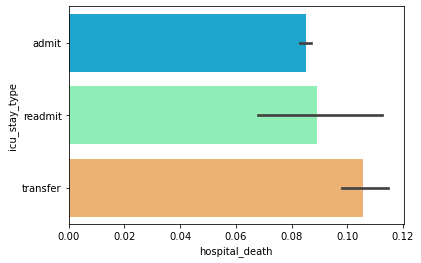

In [101]:
sns.barplot(data=data,y=categorical[4],x='hospital_death',palette='rainbow')

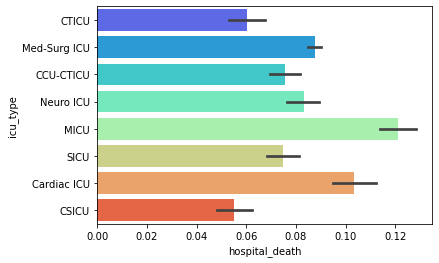

In [102]:
sns.barplot(data=data,y=categorical[5],x='hospital_death',palette='rainbow')

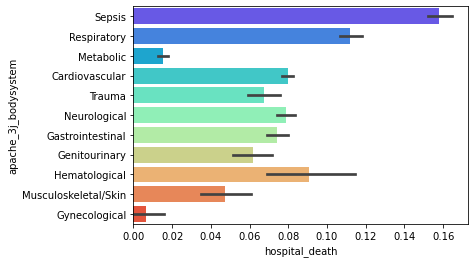

In [103]:
sns.barplot(data=data,y=categorical[6],x='hospital_death',palette='rainbow')

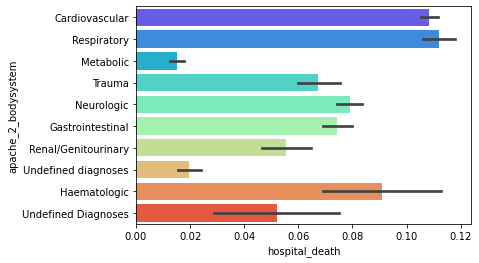

In [104]:
sns.barplot(data=data,y=categorical[7],x='hospital_death',palette='rainbow')

### Preprocessing:


#### Handling the missing values

In [105]:


# dropping the columns with more than 50% missing values

dropped_Feat=missing_values_percent[missing_values_percent>=50].index.tolist()
data.drop(missing_values_percent[missing_values_percent>=50].index.tolist(),axis=1,inplace=True)




In [106]:
len(dropped_Feat)

74

In [107]:
# checking the shape of data after dropping the features
data.shape

(91713, 109)

In [108]:
#imputating the columns 
# since outliers are present in numerical features replacing the missing values with median 
# replacing the categorical features having missing  values with mode  
impute_cols = [x for x in  missing_values_percent[(missing_values_percent!= 0) & (missing_values_percent<50)].index.tolist()]
for feat in impute_cols:
    if feat in numerical:
        data[feat] = data[feat].fillna(data[feat].median())
    elif feat in categorical:
        data[feat]=data[feat].fillna(data[feat].mode()[0])

In [109]:
data.shape

(91713, 109)

#### Handling the skewed features

In [110]:
# finding the numerical features that are not dropped in handling  missing values  part 
fea=[x for x in numerical if x not in dropped_Feat] 

#finding the skewness of resultant numerical features
len(data[fea].skew())


100

In [111]:
# finding the positive skewed features
positive_skew_feat=data[fea].skew()[data[fea].skew()>=0].index.tolist()
len(positive_skew_feat)

74

In [112]:
# finding the negative skewed features

negative_skew_feat=data[fea].skew()[data[fea].skew()<0].index.tolist()
len(negative_skew_feat)

26

In [113]:
# applying log transformation for handling +ve skewed features

for s in positive_skew_feat:
    data[s]=np.where(data[s]==0,0.01,data[s])
    np.log(data[s])

In [114]:
# applying square root transformation for handling -ve skewed features
for n in negative_skew_feat:
    np.sqrt(data[n])

#### Categorical encoding

In [115]:
# encoding - converting the categorical into numerical features

for c in categorical:
    encoder = ce.BinaryEncoder()
    data[c] = encoder.fit_transform(data[c])
    

In [116]:
#checking the data after encoding the categorical features
data[categorical].head(5)

ethnicity  gender  hospital_admit_source  icu_admit_source  icu_stay_type  \
0          0       0                      0                 0              0   
1          0       1                      0                 0              0   
2          0       1                      0                 0              0   
3          0       1                      0                 0              0   
4          0       0                      0                 0              0   

   icu_type  apache_3j_bodysystem  apache_2_bodysystem  
0         0                     0                    0  
1         0                     0                    0  
2         0                     0                    0  
3         0                     0                    0  
4         0                     0                    0

In [117]:
data.shape

(91713, 109)

In [118]:
data.dtypes

hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                 float64
ethnicity                          int64
gender                             int64
height                           float64
hospital_admit_source              int64
icu_admit_source                   int64
icu_id                             int64
icu_stay_type                      int64
icu_type                           int64
pre_icu_los_days                 float64
readmission_status               float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            float64
arf_apache                       float64
bun_apache                       float64
creatinine_apache                float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apach

In [119]:
X=data.drop(['hospital_death'],axis=1)
y=data[['hospital_death']]

bestfeatures=SelectKBest(score_func=f_regression,k=20)
features=bestfeatures.fit(X,y)


print("Shape of X :", X.shape)
print("Shape of y:", y.shape)

dfscores=pd.DataFrame(features.scores_)
dfcolumns=pd.DataFrame(X.columns)

features_scores=pd.concat([dfcolumns,dfscores],axis=1)
#renaming the columns as Features,Score
features_scores.columns=['Features','Score']

#prints the all features with corresponding scores
features_scores

#printing the top 20 features
print(features_scores.nlargest(20,'Score'))

Shape of X : (91713, 108)
Shape of y: (91713, 1)
                         Features        Score
96  apache_4a_hospital_death_prob  9087.538600
97       apache_4a_icu_death_prob  7447.085012
21               gcs_motor_apache  7424.255667
20                gcs_eyes_apache  6150.786306
23              gcs_verbal_apache  5172.316549
32              ventilated_apache  4955.012174
49                   d1_sysbp_min  4223.006704
47                    d1_spo2_min  4202.678684
51       d1_sysbp_noninvasive_min  4170.026313
53                    d1_temp_min  3912.773231
41                     d1_mbp_min  3622.710766
43         d1_mbp_noninvasive_min  3581.813029
35                  d1_diasbp_min  3043.948651
37      d1_diasbp_noninvasive_min  3021.000143
74                     d1_bun_max  2936.290427
27               intubated_apache  2786.802616
75                     d1_bun_min  2773.872349
18                     bun_apache  2565.927557
38               d1_heartrate_max  2493.962781
31         

In [120]:
# defining the input and output

X_new=data[['apache_4a_hospital_death_prob','apache_4a_icu_death_prob','gcs_motor_apache','gcs_eyes_apache','gcs_verbal_apache','ventilated_apache','d1_sysbp_min','d1_spo2_min','d1_sysbp_noninvasive_min','d1_temp_min','d1_mbp_min','d1_mbp_noninvasive_min','d1_diasbp_min','d1_diasbp_noninvasive_min','d1_bun_max','intubated_apache','d1_bun_min','bun_apache','d1_heartrate_max','temp_apache']]              
y_new=data['hospital_death']

print("Shape of X_new:",X_new.shape)
print("Shape of y_new:",y_new.shape)

Shape of X_new: (91713, 20)
Shape of y_new: (91713,)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (64199, 20)
Shape of y_train: (64199,)
Shape of X_test: (27514, 20)
Shape of y_test: (27514,)


In [122]:
# handling the class imbalance problem
counter=Counter(y_train)


print("Before smothe:")
for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")
    

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)



Before smothe:
Class= 0, n=58648 (91.35%)
Class= 1, n=5551 (8.65%)


In [123]:
print("After smothe:")

counter=Counter(y_train)
for k,v in counter.items():
    per = 100*v/len(y_train.values)
    print(f"Class = {k}, n={v} ({per:.2f}%)")

After smothe:
Class = 0, n=58648 (50.00%)
Class = 1, n=58648 (50.00%)


In [124]:
data.head(2)

hospital_death   age    bmi  elective_surgery  ethnicity  gender  height  \
0               0  68.0  22.73              0.01          0       0   180.3   
1               0  77.0  27.42              0.01          0       1   160.0   

   hospital_admit_source  icu_admit_source  icu_id  icu_stay_type  icu_type  \
0                      0                 0      92              0         0   
1                      0                 0      90              0         0   

   pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  \
0          0.541667                0.01    73.9               113.0   
1          0.927778                0.01    70.2               108.0   

   apache_3j_diagnosis  apache_post_operative  arf_apache  bun_apache  \
0               502.01                   0.01        0.01        31.0   
1               203.01                   0.01        0.01         9.0   

   creatinine_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0               2.51              3.0               6.0               0.01   
1               0.56              1.0               3.0               0.01   

   gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  \
0                4.0           168.0              118.0               27.4   
1                1.0           145.0              120.0               36.9   

   intubated_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0              0.01        40.0             36.0          134.0         39.3   
1              0.01        46.0             33.0          145.0         35.1   

   ventilated_apache  wbc_apache  d1_diasbp_max  d1_diasbp_min  \
0               0.01        14.1           68.0           37.0   
1               1.00        12.7           95.0           31.0   

   d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0                       68.0                       37.0             119.0   
1                       95.0                       31.0             118.0   

   d1_heartrate_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  \
0              72.0        89.0        46.0                    89.0   
1              72.0       120.0        38.0                   120.0   

   d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min  d1_spo2_max  \
0                    46.0             34.0             10.0        100.0   
1                    38.0             32.0             12.0        100.0   

   d1_spo2_min  d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  \
0         74.0         131.0          73.0                     131.0   
1         70.0         159.0          67.0                     159.0   

   d1_sysbp_noninvasive_min  d1_temp_max  d1_temp_min  h1_diasbp_max  \
0                      73.0         39.9         37.2           68.0   
1                      67.0         36.3         35.1           61.0   

   h1_diasbp_min  h1_diasbp_noninvasive_max  h1_diasbp_noninvasive_min  \
0           63.0                       68.0                       63.0   
1           48.0                       61.0                       48.0   

   h1_heartrate_max  h1_heartrate_min  h1_mbp_max  h1_mbp_min  \
0             119.0             108.0        86.0        85.0   
1             114.0             100.0        85.0        57.0   

   h1_mbp_noninvasive_max  h1_mbp_noninvasive_min  h1_resprate_max  \
0                    86.0                    85.0             26.0   
1                    85.0                    57.0             31.0   

   h1_resprate_min  h1_spo2_max  h1_spo2_min  h1_sysbp_max  h1_sysbp_min  \
0             18.0        100.0         74.0         131.0         115.0   
1             28.0         95.0         70.0          95.0          71.0   

   h1_sysbp_noninvasive_max  h1_sysbp_noninvasive_min  h1_temp_max  \
0                     131.0                     115.0         39.5   
1                      95.0                      71.0         36.3   

   h

In [125]:
# applying minmax scalar 

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data`
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

### Model building:

In [126]:
#  create baseline neural network model 


model = Sequential()

#adding layers to the model
model.add(Dense(12, input_dim=20, activation='relu')) 
model.add(Dense(8, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid'))# output layer

#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [127]:



# fit the keras model on the dataset
history = model.fit(X_train_norm, y_train, epochs=70, batch_size=10)



Epoch 1/70
11730/11730 [==============================] - 8s 685us/step - loss: 0.4268 - accuracy: 0.8051
Epoch 2/70
11730/11730 [==============================] - 14s 1ms/step - loss: 0.3619 - accuracy: 0.8404
Epoch 3/70
11730/11730 [==============================] - 10s 879us/step - loss: 0.3506 - accuracy: 0.8458
Epoch 4/70
11730/11730 [==============================] - 8s 701us/step - loss: 0.3453 - accuracy: 0.8489
Epoch 5/70
11730/11730 [==============================] - 8s 711us/step - loss: 0.3421 - accuracy: 0.8499
Epoch 6/70
11730/11730 [==============================] - 9s 752us/step - loss: 0.3400 - accuracy: 0.85030s - loss: 0.3408 - 
Epoch 7/70
11730/11730 [==============================] - 9s 799us/step - loss: 0.3373 - accuracy: 0.8512
Epoch 8/70
11730/11730 [==============================] - 8s 681us/step - loss: 0.3352 - accuracy: 0.8526
Epoch 9/70
11730/11730 [==============================] - 8s 670us/step - loss: 0.3332 - accuracy: 0.8530
Epoch 10/70
11730/11730 [=

In [128]:
# evaluate the model
y_predict=model.predict(X_test_norm)

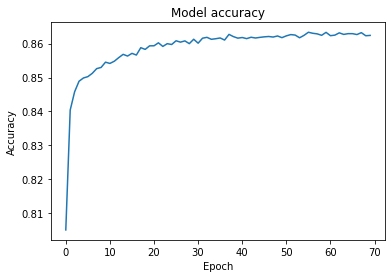

In [129]:
# plotting the accuracy at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

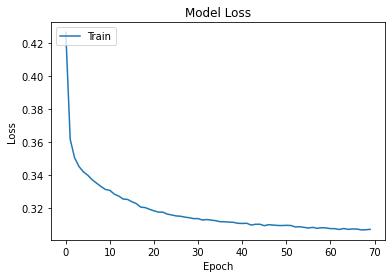

In [130]:
# plotting the loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

#### Hyperparameter tuning 

In [131]:
# defining the Hyper model using the model builder function

def build_model(hp):
    
    model=Sequential()
    
    #Tune the first hidden layer
    model.add(
        Dense(units=hp.Int('units', 8, 64, 4, default=8),
              activation=hp.Choice('dense_activation',values=['relu', 'tanh', 'sigmoid'],default='relu'),
              input_shape = (X_train_norm.shape[1],)
             )
    )
    
    #Tune the second hidden layer
    model.add(
        Dense(units=hp.Int('units', 8, 64, 4, default=8),
              activation=hp.Choice('dense_activation',values=['relu', 'tanh', 'sigmoid'],default='relu')
             )
    )
    
    #output layer
    model.add(Dense(1, activation='sigmoid'))
    
    #tuning the learning rate for optimizer -> choosing optimal value from 0.01,0.001 or 0.0001
    hp_learning_rate=hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])
    opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
    
    #compile the neural network model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    #returning the neural network model
    return model
    

In [132]:
# Instantiate Hyerband  from keras tuner

tuner_hb=kt.Hyperband(build_model,objective='val_accuracy',max_epochs=10,hyperband_iterations=1)


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [133]:
tuner_hb

In [134]:
# searching for optimal hyperparameters

tuner_hb.search(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

INFO:tensorflow:Oracle triggered exit


In [135]:
# getting best hyperparameters

best_hyperparameters=tuner_hb.get_best_hyperparameters()[0]

In [136]:
best_hyperparameters.values

{'units': 16,
 'dense_activation': 'relu',
 'learning_rate': 0.01,
 'tuner/epochs': 4,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [137]:
n_best_models=tuner_hb.get_best_models(num_models=2)
n_best_models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


### Model with the best parameters

In [138]:
model_hb=tuner_hb.hypermodel.build(best_hyperparameters)
history=model_hb.fit(X_train_norm,y_train,epochs=4,validation_data=(X_test_norm,y_test))

Epoch 1/4
3666/3666 [==============================] - 4s 1ms/step - loss: 0.3872 - accuracy: 0.8246 - val_loss: 0.3542 - val_accuracy: 0.8564
Epoch 2/4
3666/3666 [==============================] - 3s 889us/step - loss: 0.3323 - accuracy: 0.8535 - val_loss: 0.2864 - val_accuracy: 0.8887
Epoch 3/4
3666/3666 [==============================] - 3s 862us/step - loss: 0.3219 - accuracy: 0.8571 - val_loss: 0.3680 - val_accuracy: 0.8394
Epoch 4/4
3666/3666 [==============================] - 3s 896us/step - loss: 0.3168 - accuracy: 0.8590 - val_loss: 0.3206 - val_accuracy: 0.8727


#### Random Search

In [139]:
tuner_rs=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=4,executions_per_trial=1,directory='random_Search')

INFO:tensorflow:Reloading Oracle from existing project random_Search\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from random_Search\untitled_project\tuner0.json


In [140]:
# searching for optimal hyperparameters

tuner_rs.search(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

INFO:tensorflow:Oracle triggered exit


In [141]:
# getting best hyperparameters

best_hyperparameters=tuner_hb.get_best_hyperparameters()[0]

In [142]:
best_hyperparameters.values

{'units': 16,
 'dense_activation': 'relu',
 'learning_rate': 0.01,
 'tuner/epochs': 4,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [143]:
n_best_models=tuner_hb.get_best_models(num_models=2)
n_best_models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [144]:
#model with the best hyperparameters
model_hb=tuner_hb.hypermodel.build(best_hyperparameters)
history=model_hb.fit(X_train_norm,y_train,epochs=4,validation_data=(X_test_norm,y_test))

Epoch 1/4
3666/3666 [==============================] - 4s 886us/step - loss: 0.4020 - accuracy: 0.8192 - val_loss: 0.4528 - val_accuracy: 0.8249
Epoch 2/4
3666/3666 [==============================] - 3s 812us/step - loss: 0.3551 - accuracy: 0.8432 - val_loss: 0.3395 - val_accuracy: 0.8704
Epoch 3/4
3666/3666 [==============================] - 3s 799us/step - loss: 0.3361 - accuracy: 0.8517 - val_loss: 0.3865 - val_accuracy: 0.8461
Epoch 4/4
3666/3666 [==============================] - 3s 813us/step - loss: 0.3277 - accuracy: 0.8558 - val_loss: 0.3809 - val_accuracy: 0.8374


#### Bayesian Optimization

In [145]:
tuner_bayesian=kt.BayesianOptimization(build_model,objective='val_accuracy',max_trials=4,directory='Bayesian_optimization')

INFO:tensorflow:Reloading Oracle from existing project Bayesian_optimization\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from Bayesian_optimization\untitled_project\tuner0.json


In [146]:
# searching for optimal hyperparameters

tuner_bayesian.search(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

INFO:tensorflow:Oracle triggered exit


In [147]:
# getting best hyperparameters

best_hyperparameters=tuner_bayesian.get_best_hyperparameters()[0]

In [148]:
best_hyperparameters.values

{'units': 64, 'dense_activation': 'relu', 'learning_rate': 0.01}

In [149]:
n_best_models=tuner_bayesian.get_best_models(num_models=2)
n_best_models[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [150]:
#model with the best hyperparameters
model_bayesian=tuner_bayesian.hypermodel.build(best_hyperparameters)
history=model_hb.fit(X_train_norm,y_train,epochs=4,validation_data=(X_test_norm,y_test))

Epoch 1/4
3666/3666 [==============================] - 3s 840us/step - loss: 0.3247 - accuracy: 0.8566 - val_loss: 0.2808 - val_accuracy: 0.8899
Epoch 2/4
3666/3666 [==============================] - 3s 912us/step - loss: 0.3215 - accuracy: 0.8574 - val_loss: 0.3144 - val_accuracy: 0.8738
Epoch 3/4
3666/3666 [==============================] - 3s 819us/step - loss: 0.3180 - accuracy: 0.8591 - val_loss: 0.3377 - val_accuracy: 0.8658
Epoch 4/4
3666/3666 [==============================] - 3s 832us/step - loss: 0.3168 - accuracy: 0.8598 - val_loss: 0.3476 - val_accuracy: 0.8524


Among the Hyperband,RandomSearch,Bayesian Optization the best accuracy acheived with Bayesian Optimization hyperparameter technique.

In [151]:
#saving the model build with Bayesian Optimization
model_bayesian.save('C:/Users/lavan/TMLC_Projects/Deeplearning/Patient_Survival_Prediction/Model/keras_model.h5')

In [152]:
#loading the model 
from keras.models import load_model
model = load_model('C:/Users/lavan/TMLC_Projects/Deeplearning/Patient_Survival_Prediction/Model/keras_model.h5')
model

### Explainable AI by SHAP Deep Explainer

In [153]:
# compute shap values
explainer=shap.DeepExplainer(model,X_train_norm)
print(explainer)


In [154]:
#obtaining the shap values for the first 10 rows of the test data
shap_values=explainer.shap_values(X_test_norm[:10])
shap_values

[array([[-1.81926196e-03, -1.04439398e-03,  4.55823320e-03,
          1.24380963e-03,  3.71173982e-03,  1.05910267e-02,
          1.21951915e-03,  6.55601628e-04, -4.97311919e-05,
         -1.20272236e-03, -1.56471229e-04, -8.88823988e-04,
          8.54675828e-04, -6.80918508e-04,  9.45956584e-05,
         -4.06183655e-03,  3.89883754e-03,  1.04226570e-03,
          1.12378577e-02,  6.47556247e-05],
        [-1.92593364e-03, -7.40392328e-04,  4.87221342e-03,
          6.85751064e-03,  3.87053492e-03,  7.01180385e-03,
          3.65617805e-03,  2.00695649e-03, -2.31307593e-03,
         -5.98686621e-04, -1.20195777e-03,  3.64266985e-04,
         -8.93641252e-03, -9.54856468e-03,  8.80824574e-04,
         -4.22584251e-03, -3.67905124e-05,  2.01398875e-03,
          1.12212060e-03,  2.56890295e-04],
        [-1.35927800e-03, -1.17793024e-03,  3.03542429e-03,
          8.30092252e-03,  6.37781471e-03,  6.56181923e-03,
         -2.13581913e-03,  3.65870157e-03,  2.58539133e-03,
         -2.

#### SHAP Global Interpretation

summary plot: shows the most important features and the magnitude of their impact on the model

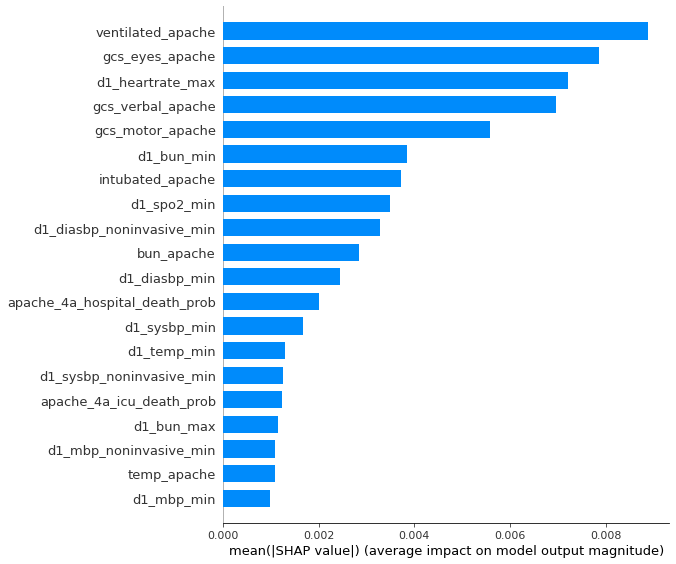

In [155]:



shap.summary_plot(shap_values[0],plot_type='bar',feature_names=X_test.columns)

#### SHAP Local Interpretation


In [156]:
# initialize javascript visualizations in notebook environment
shap.initjs()

In [157]:
shap.force_plot(explainer.expected_value[0].numpy(),shap_values[0][0],features=X_train.columns)

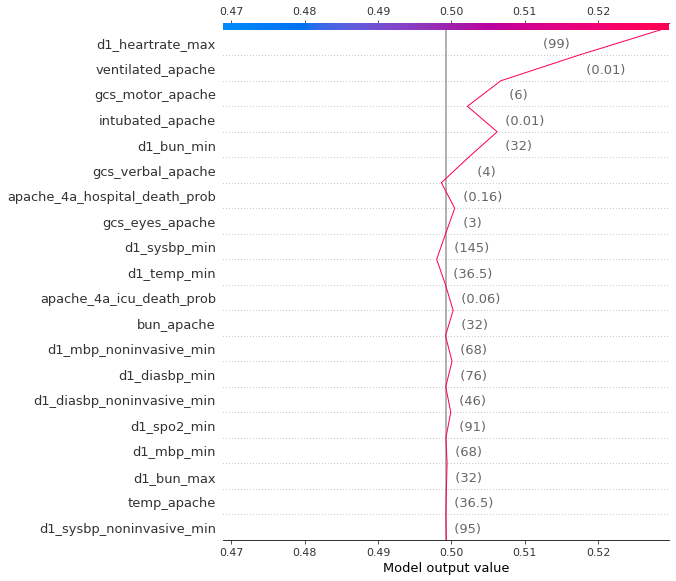

In [158]:
shap.decision_plot(explainer.expected_value[0].numpy(),shap_values[0][0],features=X_train.iloc[0,:],feature_names=X_test.columns.tolist())

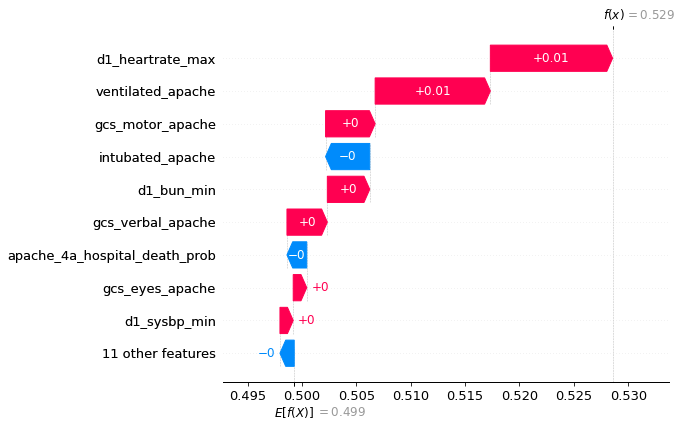

In [159]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(),shap_values[0][0],feature_names=X_test.columns)